<a href="https://colab.research.google.com/github/phatt-23/ZSU/blob/master/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment**

## Task 1: Exploratory Data Analysis (15 points)

- Perform exploratory data analysis on your assigned dataset
- Create meaningful visualizations to understand data distributions and relationships
- Formulate and test hypotheses based on your observations
- **MANDATORY**: Comment your analysis insights in Markdown cells
- Explain the patterns, outliers, and correlations you discover


## Task 2: Clustering Analysis (30 points)

- Preprocessing Pipeline:
    - Describe all preprocessing operations for each feature (scaling, encoding, dropping, etc.)

- Part 1: K-Means Clustering

    - Apply K-Means clustering algorithm to your preprocessed data
    - Use the elbow method and/or silhouette coefficient to determine optimal cluster count
    - Visualize results using boxplots, bar plots, and scatter plots
    - **MANDATORY**: Define cluster characteristics in Markdown cells
    - Compare feature values across different clusters

- Part 2: Alternative Clustering Algorithm

    - Choose another algorithm from sklearn documentation
    - Agglomerative clustering is recommended as a good starting point
    - Research the algorithm through blog posts, books, or videos
    - Repeat the analysis process from Part 1
    - Compare results with K-Means clustering

- **IMPORTANT**: Part 2 is worth 10 points. Skipping it limits your maximum score to 35 points!


## General Requirements

- **MANDATORY**: Include a summary at the end with the most interesting insights
- Upload a Jupyter Notebook with descriptions or PDF report + source code
- Estimated time: 6-12 hours (varies by skill level)
- Use your VSB login when uploading your project.




# **Dataset: Student Performance & Social Factors**

- Scenario:
    - Education Insights Research Group analyzing factors affecting student academic performance.

    - Survey data from secondary school students including social background, gender, study habits, family situation, and academic grades.
    
    - Understand patterns that influence educational outcomes.

- Available:
    - **Math course (student-mat.csv)** (I chose this one)
    - Portuguese course (student-por.csv)

- Key Features:
    - Demographics
    - Study Time
    - Family Support
    - Social Activities
    - Grades


# **Objectives**

- Perform dataset exploration using various types of data visualization.
- Perform data preprocessing before using clustering.
- Grouping students into clusters using various clustering models.
    - Partition based (K-Means)
    - Hierarchical Clustering (Agglomerative)
- Perform interpretation and analysis of the groups (profiling) that have been created.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [ ]:
import urllib.request
import zipfile
from io import StringIO

url = 'https://homel.vsb.cz/~pla06/files/fml/data/zsu_04_student.zip'
filehandle, _ = urllib.request.urlretrieve(url)
z = zipfile.ZipFile(filehandle, 'r')

assert(z.namelist() == [
    'student-mat.csv',
    'student-por.csv'
])

df_mat = pd.read_csv(z.open('student-mat.csv'))
df_por = pd.read_csv(z.open('student-por.csv'))
display(df_mat.head())
display(df_por.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


## **Understading the dataset**


In [ ]:
display(df_mat.shape)
display(df_mat.info())
df_mat.columns

(395, 33)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

None

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
print('Unique values for selected columns in df_mat:')

selected_columns = [
    'school',
    'sex',
    # 'age',
    'address',
    'famsize',
    'Pstatus',
    'Medu',
    'Fedu',
    'Mjob',
    'Fjob',
    'reason',
    'guardian',
    'traveltime',
    'studytime',
    'failures',
    'schoolsup',
    'famsup',
    'paid',
    'activities',
    'nursery',
    'higher',
    'internet',
    'romantic',
    'famrel',
    'freetime',
    'goout',
    'Dalc',
    'Walc',
    'health',
    'absences',
    'G1',
    'G2',
    'G3'
]

for col in selected_columns:
    if col in df_mat.columns:
        if df_mat[col].dtype == 'object':
            display(df_mat[col].value_counts())
        else:
            # int types (this dataset only contains integer numbers)
            display(df_mat[col].value_counts().sort_index())

Unique values for selected columns in df_mat:


,count
school,
GP,349
MS,46


,count
sex,
F,208
M,187


,count
address,
U,307
R,88


,count
famsize,
GT3,281
LE3,114


,count
Pstatus,
T,354
A,41


,count
Medu,
0,3
1,59
2,103
3,99
4,131


,count
Fedu,
0,2
1,82
2,115
3,100
4,96


,count
Mjob,
other,141
services,103
at_home,59
teacher,58
health,34


,count
Fjob,
other,217
services,111
teacher,29
at_home,20
health,18


,count
reason,
course,145
home,109
reputation,105
other,36


,count
guardian,
mother,273
father,90
other,32


,count
traveltime,
1,257
2,107
3,23
4,8


,count
studytime,
1,105
2,198
3,65
4,27


,count
failures,
0,312
1,50
2,17
3,16


,count
schoolsup,
no,344
yes,51


,count
famsup,
yes,242
no,153


,count
paid,
no,214
yes,181


,count
activities,
yes,201
no,194


,count
nursery,
yes,314
no,81


,count
higher,
yes,375
no,20


,count
internet,
yes,329
no,66


,count
romantic,
no,263
yes,132


,count
famrel,
1,8
2,18
3,68
4,195
5,106


,count
freetime,
1,19
2,64
3,157
4,115
5,40


,count
goout,
1,23
2,103
3,130
4,86
5,53


,count
Dalc,
1,276
2,75
3,26
4,9
5,9


,count
Walc,
1,151
2,85
3,80
4,51
5,28


,count
health,
1,47
2,45
3,91
4,66
5,146


,count
absences,
0,115
1,3
2,65
3,8
4,53
5,5
6,31
7,7
8,22


,count
G1,
3,1
4,1
5,7
6,24
7,37
8,41
9,31
10,51
11,39


,count
G2,
0,13
4,1
5,15
6,14
7,21
8,32
9,50
10,46
11,35


,count
G3,
0,38
4,1
5,7
6,15
7,9
8,32
9,28
10,56
11,47


| column            | description |
|-------------------|-------------|
| **school**        | 'GP' and 'MS' likely represent different schools |
| **sex**           | 'F' for Female, 'M' for Male |
| **address**       | 'U' for Urban, 'R' for Rural |
| **famsize**       | 'GT3' for family size greater than 3, 'LE3' for family size less than or equal to 3 |
| **Pstatus**       |  'A' for Apart, 'T' for Together (referring to parents' cohabitation status) |
| **Medu** and **Fedu** | Mother's and Father's education levels, likely on a scale from 0 to 4 |
| **traveltime** | Travel time to school, likely on a scale from 1 to 4  |
| **studytime** | Weekly study time, likely on a scale from 1 to 4 |
| **failures** | Number of failed classes |
| **schoolsup**, **famsup**, **paid**, **activities**, **nursery**, **higher**, **internet**, **romantic** | These appear to be binary categorical (Yes/No) features |
| **famrel** | Quality of family relationships, likely on a scale from 1 to 5 (e.g., 1 - very bad, 5 - excellent) |
| **freetime** | Free time after school, likely on a scale from 1 to 5 (e.g., 1 - very low, 5 - very high) |
| **goout** | Going out with friends, likely on a scale from 1 to 5 (e.g., 1 - very low, 5 - very high) |
| **Dalc** and **Walc** | Workday and weekend alcohol consumption, likely on a scale from 1 to 5 (e.g., 1 - very low, 5 - very high) |
| **health** | Current health status, likely on a scale from 1 to 5 (e.g., 1 - very bad, 5 - very good) |
| **G1**, **G2**, **G3** | First period, second period, and final grades, likely on a scale from 0 to 20 |

This dataset is most likely coming from Portugal, given that the grading system
uses a 0-20 numerical scale. Also the dataset contains Portuguese course further indicating this assumption.

Grading system:
- 18-20: Excellent
- 16-17: Very Good
- 14-15: Good
- 10-13: Sufficient
- 0-9: Fail

The G1, G2 and G3 are examination periods.

Columns `schoolsup` and `famsup` stand for School Support and Family Support.

Column `nursery` is boolean and tells whether the student attended Nursery School (Preschool/Kindergarten).

Column `higher` is boolean and probably means whether the student intends to
persue higher education.


# **Shape, data types, null values**

- What's the shape of the data?
- What are the data types?
- How many missing values?

In [ ]:
df_mat.shape

(395, 33)

In [ ]:
df_mat.describe(exclude=np.number)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [ ]:
df_mat.describe(include=np.number)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Some of these columns are categorical. We will to encode them later on.

In [ ]:
display(df_mat.isna().sum())
display(df_por.isna().sum())

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


These datasets don't contain any missing values. We won't need to impute or drop any records.

# **EDA - Exploratory Data Analysis (Math Course)**

- Explore distributions of G1, G2, and G3 grades using histograms or box plots.

- Explore distributions of demographic factors (`age`, `sex`, `address`, `Medu`, `Fedu`) and their relationship with the final grade (G3) using count plots, histograms, or box plots.

- Explore the impact of study and support factors (`studytime`, `failures`, `schoolsup`, `famsup`, `paid`, `activities`, `higher`, `internet`) on student performance by visualizing their distributions and their relationship with G3.

- Explore social and health factors (`famrel`, `freetime`, `goout`, `Dalc`, `Walc`, `health`, `absences`) through distribution plots and their correlation with G3.

- Compute and visualize the correlation matrix for all numerical features in to identify relationships, particularly with G1, G2, and G3.

- Summarize the key insights from this exploratory data analysis focusing on factors influencing student performance in the math course.

## **Analyze Grade Distributions**

- visualize the distributions of G1, G2, and G3 using histograms
- understand the overall performance spread and potential changes over the periods


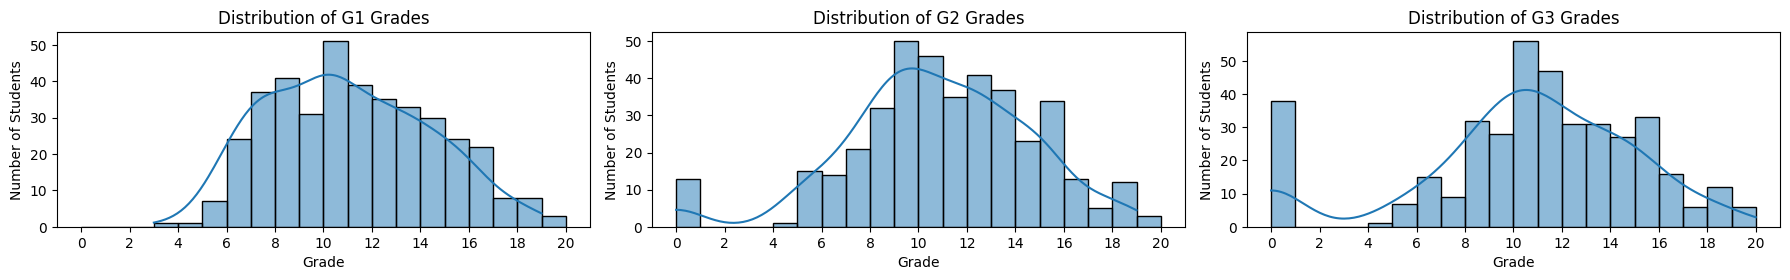

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(2, 3, 1)
plt.title('Distribution of G1 Grades')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.xticks(range(0, 21, 2))
sns.histplot(df_mat['G1'], bins=range(0, 21), kde=True)

plt.subplot(2, 3, 2)
plt.title('Distribution of G2 Grades')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.xticks(range(0, 21, 2))
sns.histplot(df_mat['G2'], bins=range(0, 21), kde=True)

plt.subplot(2, 3, 3)
plt.title('Distribution of G3 Grades')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.xticks(range(0, 21, 2))
sns.histplot(df_mat['G3'], bins=range(0, 21), kde=True)

plt.tight_layout()
plt.show()

### Observations on Grade Distributions (G1, G2, G3)

From the histograms of G1, G2, and G3 grades:

- **Right-Skewed Distributions**:
    - all three grade distributions (G1, G2, G3) appear to be right-skewed
    - indicating majority of students received higher grades
    - there's a tail of students with lower scores.
    
- **Shift in Distribution**:
    - there seems to be a shift in the distribution towards lower grades from G1 to G3
    - while G1 and G2 show a peak around 10-12, G3 exhibits a more pronounced peak at lower values
    - suggests that some students' performance might decline over the course periods, or the final exam (G3) is more challenging

- **Increase in Zero Scores for G3**:
    - a significant number of students received a grade of 0 in G3
    - more prominent compared to G1 and G2
    - could indicate students dropping out, failing to submit, or simply performing very poorly on the final assessment


These initial insights suggest that the final grade (G3) might be a critical outcome to investigate further, especially concerning the factors that contribute to the observed performance decline or very low scores.

---

## **Analyze Demographic Factors**

- visualize the distributions of demographic factors (`age`, `sex`, `address`, `Medu`, `Fedu`) and their relationship with the final grade
- using appropriate plots (count plots, histograms, or box plots)


### Demographic: Age

First, I will visualize the distribution of the 'age' demographic factor using a histogram and then examine its relationship with the final grade (G3) using a box plot to understand how age groups perform.



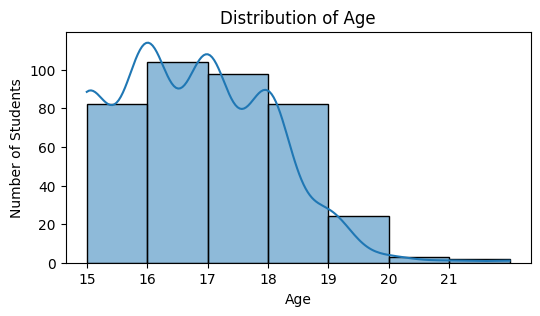

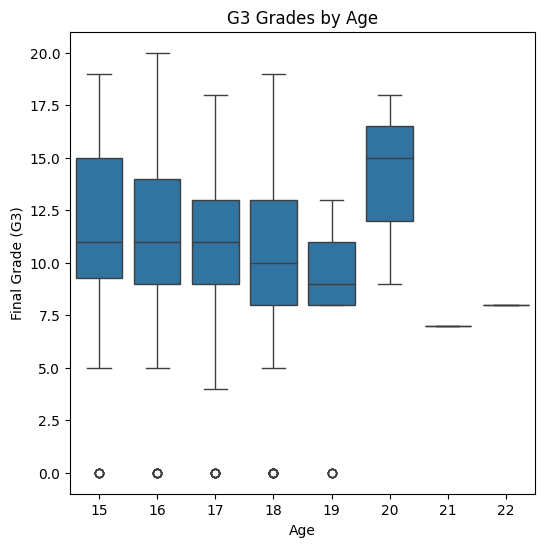

In [ ]:
plt.figure(figsize=(6, 3))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.xticks(range(df_mat['age'].min(), df_mat['age'].max()))
sns.histplot(df_mat['age'], bins=range(15, 23), kde=True)
plt.show()

plt.figure(figsize=(6, 6))
plt.title('G3 Grades by Age')
plt.xlabel('Age')
plt.ylabel('Final Grade (G3)')
sns.boxplot(x='age', y='G3', data=df_mat)
plt.show()

#### Observations on Age and Grades

- **Distribution of Age (Histogram)**:
    - most students are 16 yo, then 17, 18, 15
    - there is a visible dip is 15 yo and there are some 19 yo students
        - this suggests that some students possibly enrolled when they were 16 yo or failed some courses and had to retake the course and stayed one extra year
        - if the later were true, then that would explain why there is a dip in 15 yo as some students enrolled at 16 yo
    - there are also some 20 and 21 year olds, but the amount is negligible
    - that would also explain why most kids are 16 yo (enrolled + year 2 students)

- **G3 Grades by Age (Box Plot)**:
    - by age the grades are degrading
    - the IQR is decreasing - possibly indicating progressively more challenging courses





### Demographic: Sex

Analyze the distribution of 'sex' using a count plot and its relationship with the final grade (G3) using a box plot to understand performance differences between genders.

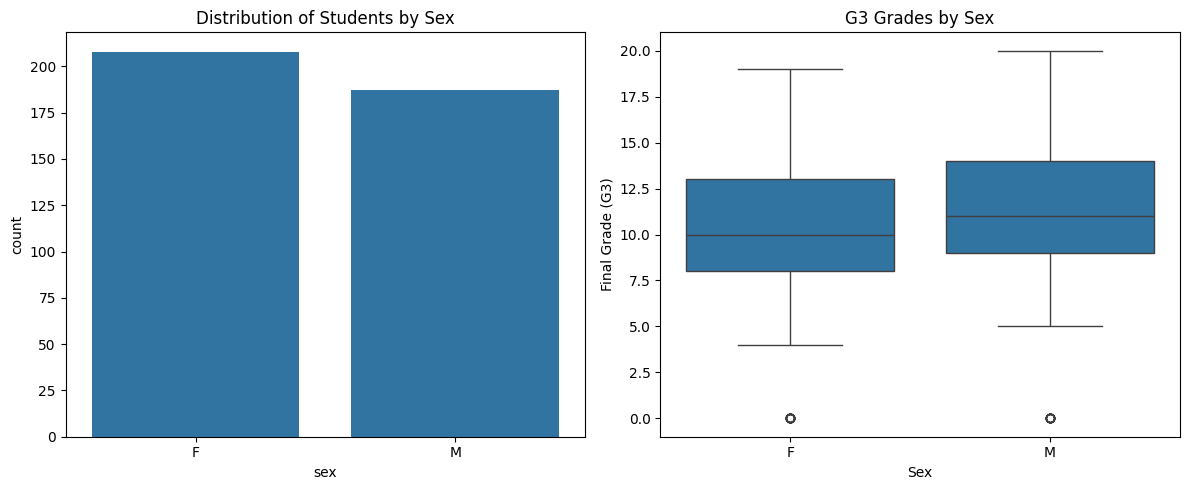

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Distribution of Students by Sex')
sns.countplot(x='sex', data=df_mat)

plt.subplot(1, 2, 2)
plt.title('G3 Grades by Sex')
plt.xlabel('Sex')
plt.ylabel('Final Grade (G3)')
sns.boxplot(x='sex', y='G3', data=df_mat)

plt.tight_layout()
plt.show()

#### Observations on Sex and G3 Grades

- **Distibution**:
    - more female students than male students
    - relatively balanced but not equal sex distribution among the students

- **G3 Grades by Sex (Box Plot)**:
    - female students tend to have a lower median G3 grade compared to male students
    - interquartile range (IQR) for female students appears similar to that for male students, suggesting consistent performance from both F and M students
   
These observations suggest a slight gender-based difference in academic performance in the final grades (G3), with female students generally performing marginally worse.

### Demographic: Address

- the distribution of 'address' (urban/rural) using a count plot
- relationship with the final grade (G3) using a box plot

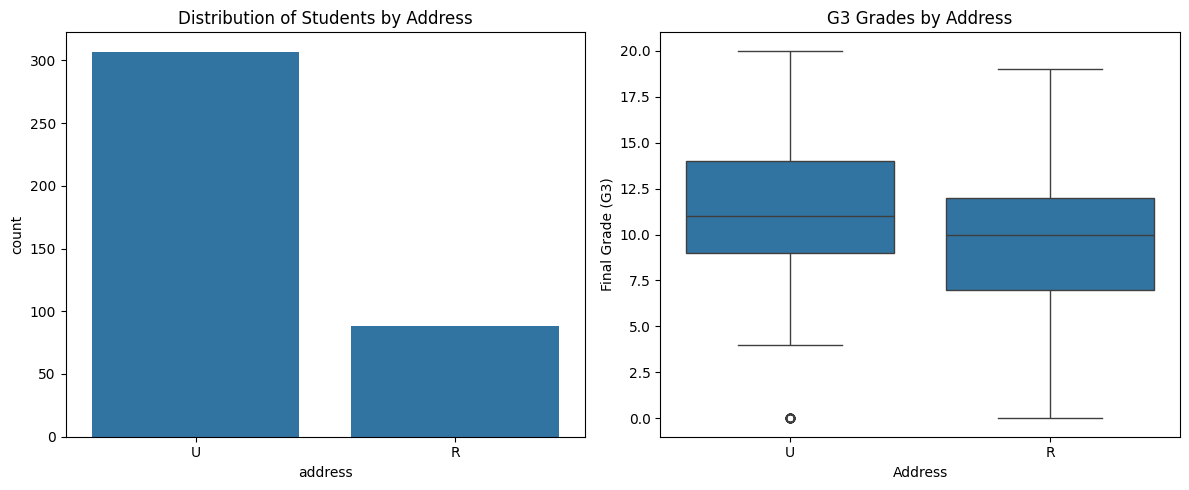

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Distribution of Students by Address')
sns.countplot(x='address', data=df_mat)

plt.subplot(1, 2, 2)
plt.title('G3 Grades by Address')
plt.xlabel('Address')
plt.ylabel('Final Grade (G3)')
sns.boxplot(x='address', y='G3', data=df_mat)

plt.tight_layout()
plt.show()

#### Demographic Factor: Observations on Address and G3 Grades

- **Distribution of Students by Address**:
    - significantly larger number of students reside in urban areas ('U') compared to rural areas ('R')
    - this imbalance is to be expected

- **G3 Grades by Address (Box Plot)**:
    - students from urban areas ('U') tend to have a slightly higher median G3 grade compared to students from rural areas ('R')
    - the interquartile range (IQR) for urban students appears somewhat the same, but the Q3 is much broader than Q1, the inverse is true for rural students
    - urban students perform better overall  
    
This observation suggests that residing in an urban area might be associated with slightly better academic performance in the final grades.

### Demographic: Parents' Education

- distributions of 'Medu' (Mother's education) and 'Fedu' (Father's education) using count plots
- relationships with the final grade (G3) using box plots to understand the impact of parental education on student performance

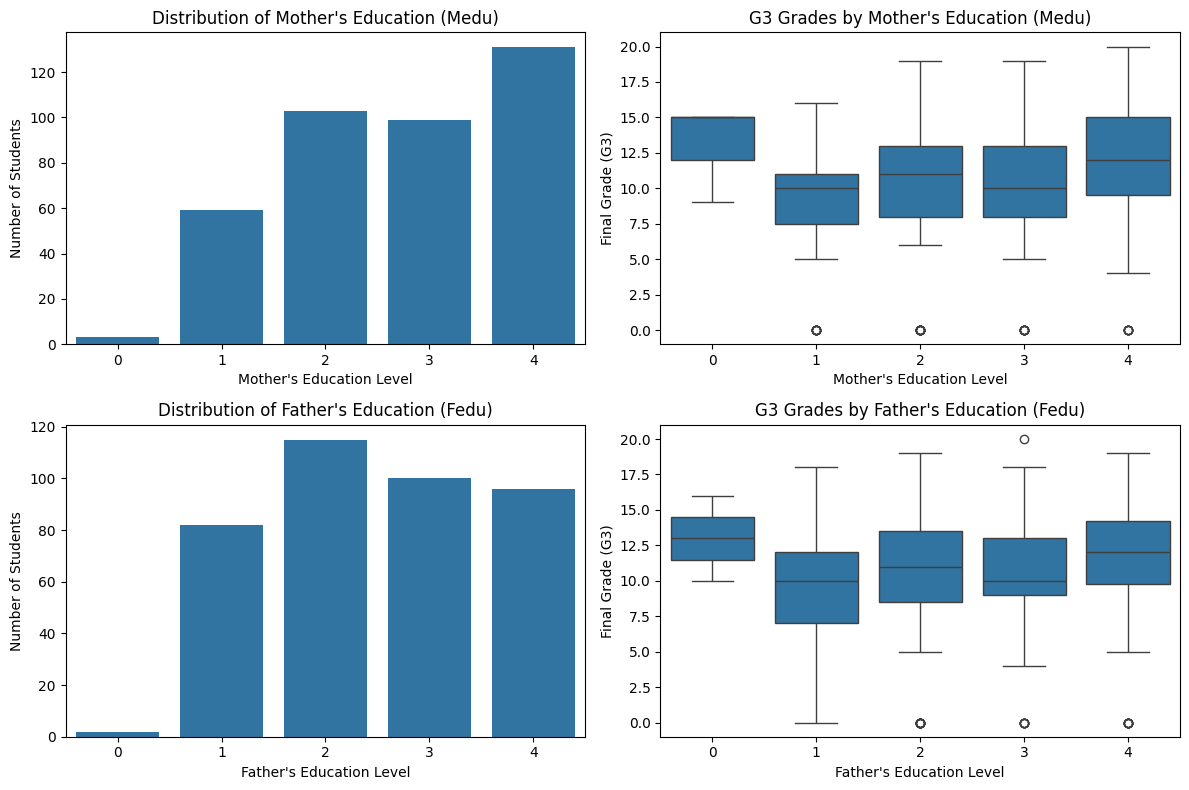

In [ ]:
plt.figure(figsize=(12, 8))

# Distribution of Medu
plt.subplot(2, 2, 1)
plt.title("Distribution of Mother's Education (Medu)")
sns.countplot(x='Medu', data=df_mat)
plt.xlabel("Mother's Education Level")
plt.ylabel('Number of Students')

# G3 Grades by Medu
plt.subplot(2, 2, 2)
plt.title("G3 Grades by Mother's Education (Medu)")
sns.boxplot(x='Medu', y='G3', data=df_mat)
plt.xlabel("Mother's Education Level")
plt.ylabel('Final Grade (G3)')

# Distribution of Fedu
plt.subplot(2, 2, 3)
plt.title("Distribution of Father's Education (Fedu)")
sns.countplot(x='Fedu', data=df_mat)
plt.xlabel("Father's Education Level")
plt.ylabel('Number of Students')

# G3 Grades by Fedu
plt.subplot(2, 2, 4)
plt.title("G3 Grades by Father's Education (Fedu)")
sns.boxplot(x='Fedu', y='G3', data=df_mat)
plt.xlabel("Father's Education Level")
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

In [ ]:
# We can disregard level 0
df_mat['Fedu'].value_counts(), df_mat['Medu'].value_counts()

(Fedu
 2    115
 3    100
 4     96
 1     82
 0      2
 Name: count, dtype: int64,
 Medu
 4    131
 2    103
 3     99
 1     59
 0      3
 Name: count, dtype: int64)

#### Observations on Parental Education (Medu, Fedu) and G3 Grades

- **Distribution of Mother's Education (Medu)**:
    - significant number of mothers having higher education levels (3 and 4), with level 4 (university degree) being the most frequent, followed by level 2 (secondary education)

    - indicates that a large proportion of students come from households where mothers are highly educated

- **G3 Grades by Mother's Education (Medu)**:
    - as the mother's education level (`Medu`) increases, the median G3 grade of students tends to increase

    - students whose mothers have higher education levels (3 or 4) generally show higher median grades and a wider spread of higher scores
        - although students with `Medu` level 4 also show a significant number of 0 grades
        - might indicate a diverse range of outcomes within this group
    - students with `Medu` 1 (low education) tend to have lower median G3 grades and more concentrated distributions at the lower end

- **Distribution of Father's Education (Fedu)**:
    - level 2 (secondary education) is the most common education level for fathers, followed by level 3 (some higher education) and level 4 (university degree)
    - compared to mothers, fewer fathers have the highest education level (4)

- **G3 Grades by Father's Education (Fedu)**:
    - similar to `Medu`, there is an observable positive correlation between `Fedu` and `G3` grades
    - students whose fathers have higher education levels (3 or 4) generally achieve higher median G3 grades
    - the increase in median G3 grades with `Fedu` is also apparent
    - lower `Fedu` levels (0 and 1) are associated with lower median G3 grades

In summary, both mother's and father's education levels appear to be positively correlated with student performance, with higher parental education generally corresponding to better G3 grades. The impact seems somewhat more pronounced and consistent for mother's education across the higher levels.

---

## **Analyze Study and Support Factors**

Explore the impact of study and support factors:
- `traveltime`
- `studytime`
- `failures`
- `schoolsup`
- `famsup`
- `paid`
- `activities`
- `higher`
- `internet`

### Study and Support: Travel Time

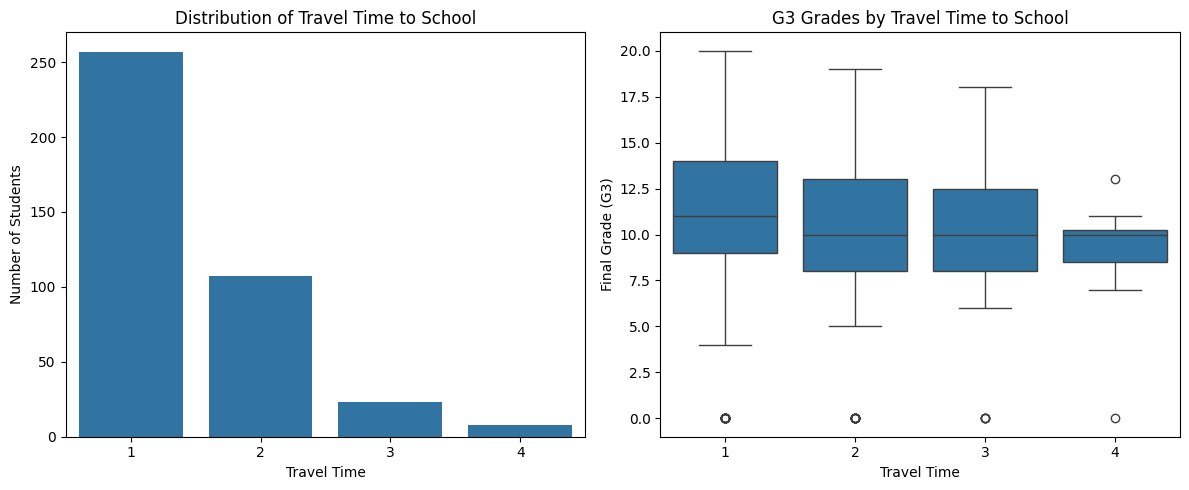

In [ ]:
plt.figure(figsize=(12, 5))

# Distribution of traveltime
plt.subplot(1, 2, 1)
plt.title('Distribution of Travel Time to School')
sns.countplot(x='traveltime', data=df_mat)
plt.xlabel('Travel Time')
plt.ylabel('Number of Students')

# G3 Grades by traveltime
plt.subplot(1, 2, 2)
plt.title('G3 Grades by Travel Time to School')
sns.boxplot(x='traveltime', y='G3', data=df_mat)
plt.xlabel('Travel Time')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

#### Observations on Travel Time and G3 Grades

- **Distribution of Travel Time**:
    - large majority of students have a short travel time to school, followed by level 2
    - fewer students have longer travel times
    - this indicates that most students attend schools relatively close to their homes

- **G3 Grades by Travel Time (Box Plot)**:
    - subtle inverse relationship between travel time and G3 grades
        - students with shorter travel times (level 1) tend to have slightly higher G3 grades compared to those with longer travel times
    
    - as travel time increases, there appears to be a slight decrease in the median G3 grade

    - the spread of grades (IQR) also seems relatively consistent, with all groups showing outliers and a notable presence of 0 grades

    - while the trend is not very strong, it hints that longer travel times (level 4) might be associated with slightly lower academic performance
    
    - however, given the small number of students in these longer travel time categories, it's hard to draw definitive conclusions without further analysis

### Study and Support: Study Time

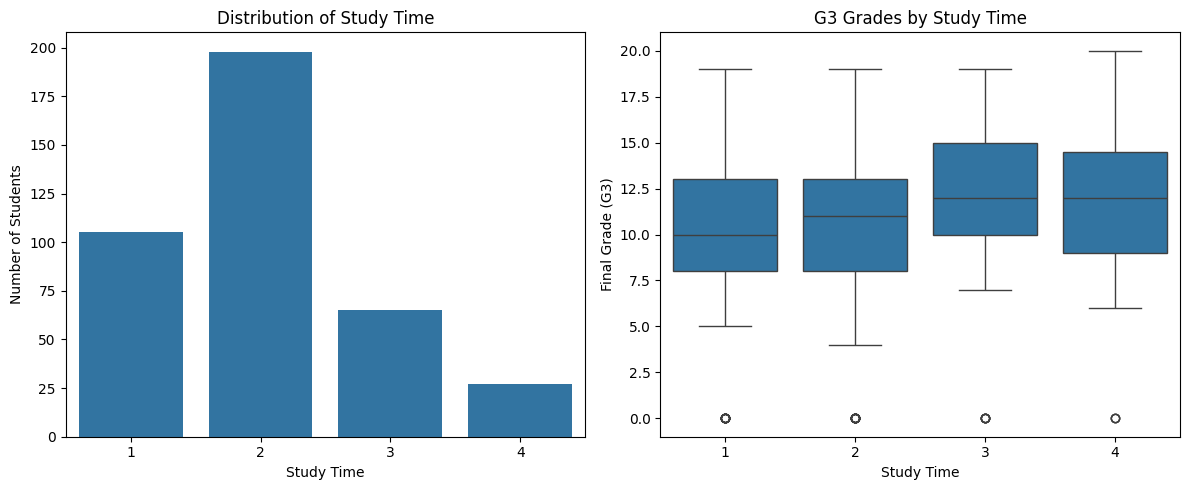

In [ ]:
plt.figure(figsize=(12, 5))

# Distribution of studytime
plt.subplot(1, 2, 1)
plt.title('Distribution of Study Time')
sns.countplot(x='studytime', data=df_mat)
plt.xlabel('Study Time')
plt.ylabel('Number of Students')

# G3 Grades by studytime
plt.subplot(1, 2, 2)
plt.title('G3 Grades by Study Time')
sns.boxplot(x='studytime', y='G3', data=df_mat)
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

In [ ]:
df_mat['studytime'].value_counts()

,count
studytime,
2,198
1,105
3,65
4,27


#### Observations on Study Time and G3 Grades

- **Distribution of Study Time**:
    - majority of students (around 200) study at level 2
    - a significant number also study less at level 1
    - fewer students dedicate to level 3 or more of studying
    - this indicates that most students fall into the moderate study time categories

- **G3 Grades by Study Time (Box Plot)**:
    - there appears to be a slight positive correlation between `studytime` and `G3` grades
        - students who study more (levels 3 and 4) tend to have slightly higher median G3 grades compared to those who study less (levels 1 and 2)
        - secifically, students in study time categories 3 and 4 generally show better performance, though the differences in medians across groups are not extremely pronounced
    - all study time groups exhibit a wide range of grades, including outliers and the presence of 0 grades, consistent with previous observations for G3
    
This overall suggests that while study time is a contributing factor, it's not the sole determinant of success, and other variables also play a significant role

### Study and Support: Failures

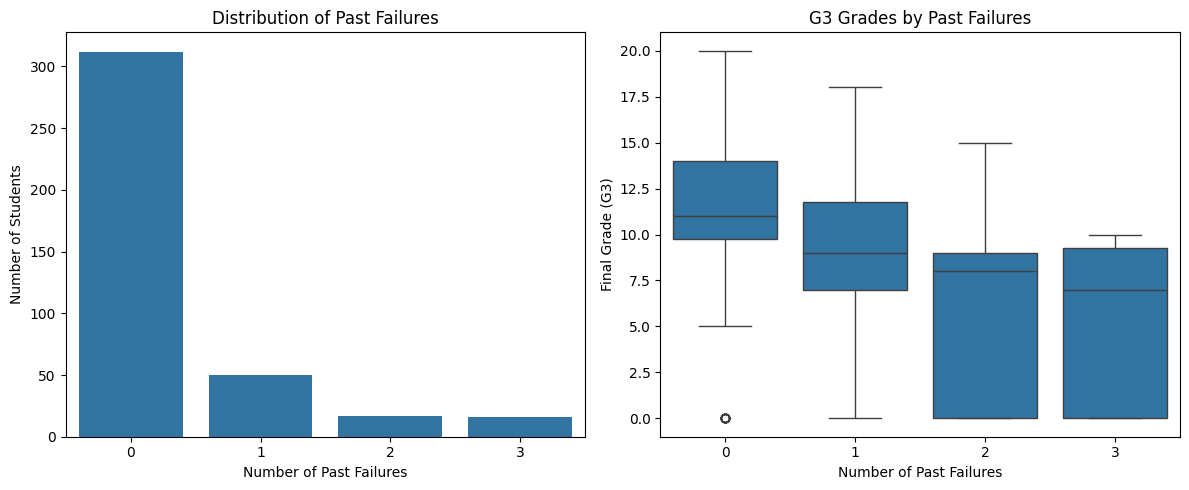

In [ ]:
plt.figure(figsize=(12, 5))

# Distribution of failures
plt.subplot(1, 2, 1)
plt.title('Distribution of Past Failures')
sns.countplot(x='failures', data=df_mat)
plt.xlabel('Number of Past Failures')
plt.ylabel('Number of Students')

# G3 Grades by failures
plt.subplot(1, 2, 2)
plt.title('G3 Grades by Past Failures')
sns.boxplot(x='failures', y='G3', data=df_mat)
plt.xlabel('Number of Past Failures')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

In [ ]:
df_mat['failures'].value_counts()

,count
failures,
0,312
1,50
2,17
3,16


#### Observations on Past Failures and G3 Grades

- **Distribution of Students by Past Failures**:
    - majority of students (over 300) have had 0 past failures
    - the number of students decreases significantly as the number of failures increases, with very few students having 3 or more failures
    - this indicates that most students have a clean academic record regarding past failures

- **G3 Grades by Past Failures (Box Plot)**:
    - strong inverse relationship between the number of past failures and G3 grades
    - students with 0 past failures consistently show the highest median G3 grades
    - as the number of past failures increases (1, 2, 3), the median G3 grade drops significantly, and the spread of grades tends to be lower, indicating overall poorer performance

This factor appears to be one of the most influential demographic/study factors analyzed so far, with a clear negative impact on final grades.

### Study and Support: School Support


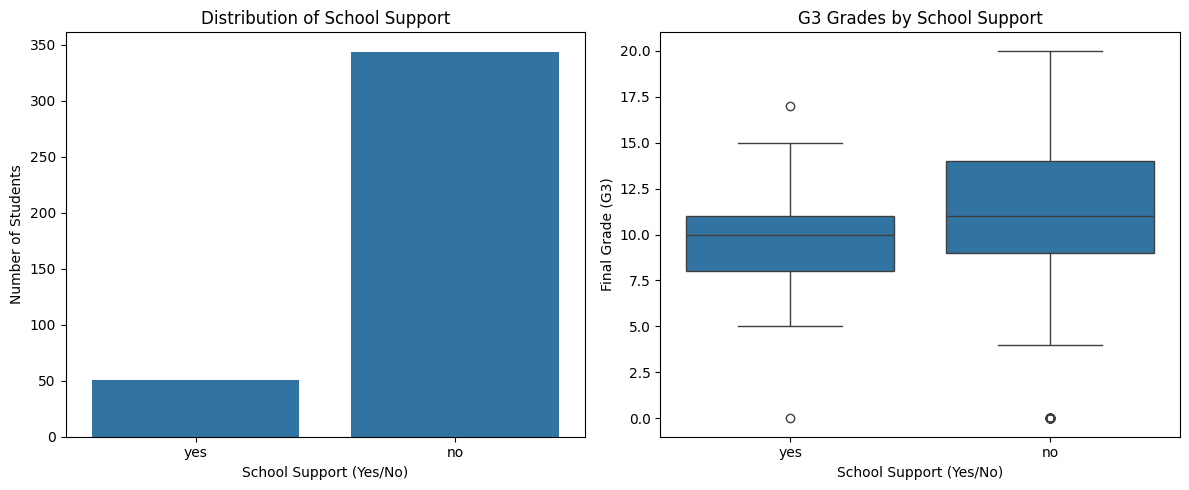

In [ ]:
plt.figure(figsize=(12, 5))

# Distribution of schoolsup
plt.subplot(1, 2, 1)
plt.title('Distribution of School Support')
sns.countplot(x='schoolsup', data=df_mat)
plt.xlabel('School Support (Yes/No)')
plt.ylabel('Number of Students')

# G3 Grades by schoolsup
plt.subplot(1, 2, 2)
plt.title('G3 Grades by School Support')
sns.boxplot(x='schoolsup', y='G3', data=df_mat)
plt.xlabel('School Support (Yes/No)')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

#### Observations on School Support and G3 Grades

-   **Distribution of Students by School Support**:
    - majority of students do not receive school support ('no'). - only a small fraction of students ('yes') receive school support

This imbalance is significant and could impact the interpretation of performance.

-   **G3 Grades by School Support (Box Plot)**:
    - counter-intuitive observation:
        - students who *do not* receive school support ('no') tend to have a slightly higher median G3 grade compared to those who *do* receive school support ('yes')
    - the interquartile range for students without school support is wider and extends to higher grades
        - suggests a greater proportion of high-achieving students in this group
        - in contrast, students with school support show a lower median and a more concentrated distribution of lower grades, with a significant number of 0 grades

This observation might suggest that school support is typically provided to students who are already struggling academically, rather than acting as a direct enhancer of grades for all recipients.

### Study and Support: Family Support

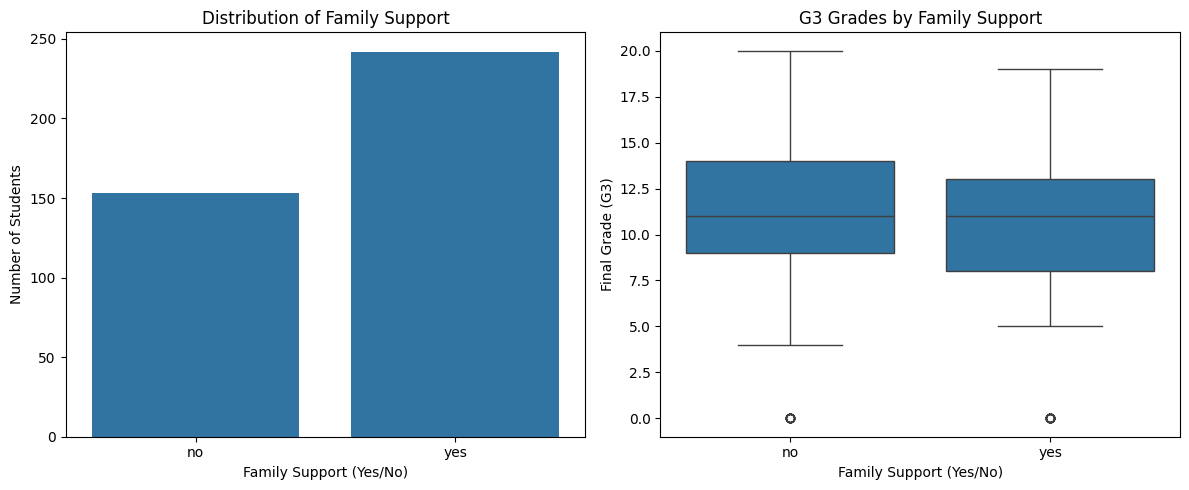

In [ ]:
plt.figure(figsize=(12, 5))

# Distribution of famsup
plt.subplot(1, 2, 1)
plt.title('Distribution of Family Support')
sns.countplot(x='famsup', data=df_mat)
plt.xlabel('Family Support (Yes/No)')
plt.ylabel('Number of Students')

# G3 Grades by famsup
plt.subplot(1, 2, 2)
plt.title('G3 Grades by Family Support')
sns.boxplot(x='famsup', y='G3', data=df_mat)
plt.xlabel('Family Support (Yes/No)')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

#### Observations on Family Support (famsup) and G3 Grades

- **Distribution of Students by Family Support**:
    - larger proportion of students receive family support ('yes') compared to those who do not ('no')
    - this suggests that family support is a common aspect for many students in this dataset

- **G3 Grades by Family Support (Box Plot)**:
    - students who receive family support ('yes') tend to have a slightly lower whisker compared to those who do not ('no')
    
    - the IQR for students without family support appears to be wider and extends to higher grades, indicating a broader spread of performance, including more high-achieving students within this group
    
    - students with family support show a slightly lower IQR
    
Counter-intuitively, there's seems to be a slight negative association between having family support and achieving better final grades.

This doesn't aligns with the expectation that family encouragement and assistance can positively influence academic performance.

### Study and Support: Paid Extra

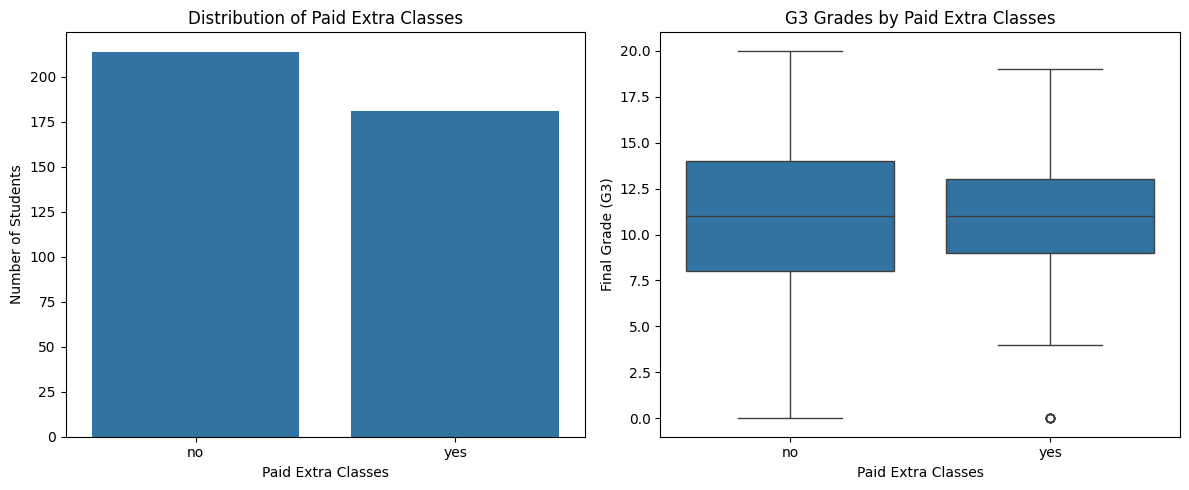

In [ ]:
plt.figure(figsize=(12, 5))

# Distribution of paid
plt.subplot(1, 2, 1)
plt.title('Distribution of Paid Extra Classes')
sns.countplot(x='paid', data=df_mat)
plt.xlabel('Paid Extra Classes')
plt.ylabel('Number of Students')

# G3 Grades by paid
plt.subplot(1, 2, 2)
plt.title('G3 Grades by Paid Extra Classes')
sns.boxplot(x='paid', y='G3', data=df_mat)
plt.xlabel('Paid Extra Classes')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

#### Observations on Paid Extra Classes and G3 Grades

- **Distribution of Students by Paid Extra Classes**:
    - more students (`no`) do not take paid extra classes than those who do (`yes`)
    - this indicates that paid extra classes are not a universally adopted practice among the students in this dataset

- **G3 Grades by Paid Extra Classes (Box Plot)**:
    - there isn't a strong positive correlation between taking paid extra classes (`paid`) and higher G3 grades
    
    - students who *do not* take paid extra classes ('no') have a slightly higher G3 grade compared to those who *do* ('yes')

    - the IQR for students not taking paid extra classes is somewhat broader, indicating a wider spread of performance and perhaps more high-achieving students in this group
    
    - students taking paid extra classes show a distribution that is more concentrated towards lower grades, including a significant number of 0 grades

Similar to 'schoolsup', this counter-intuitive finding might imply that students who opt for paid extra classes are often those who are already struggling academically and are seeking additional help.

### Study and Support: Activities

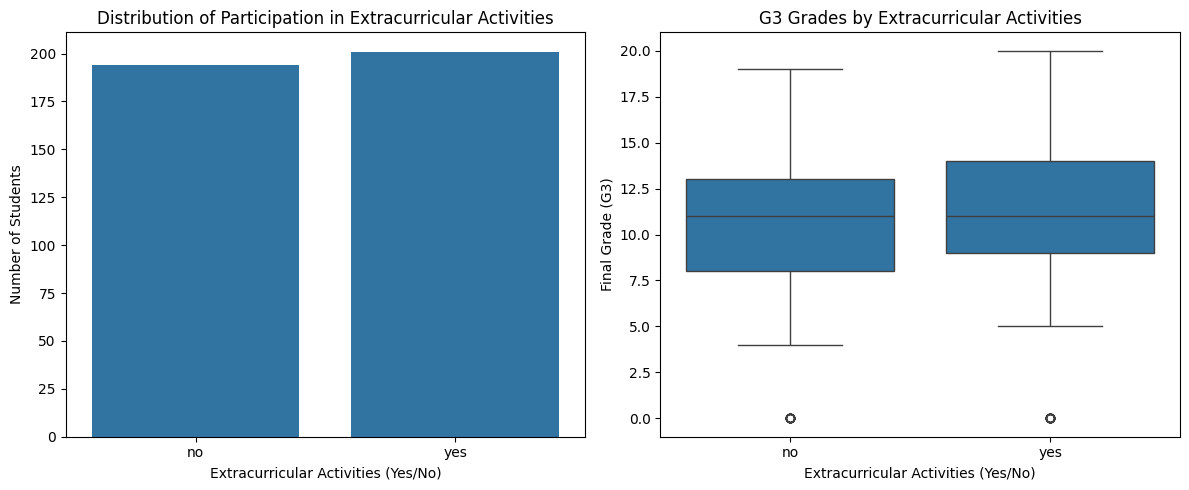

In [ ]:
plt.figure(figsize=(12, 5))

# Distribution of activities
plt.subplot(1, 2, 1)
plt.title('Distribution of Participation in Extracurricular Activities')
sns.countplot(x='activities', data=df_mat)
plt.xlabel('Extracurricular Activities (Yes/No)')
plt.ylabel('Number of Students')

# G3 Grades by activities
plt.subplot(1, 2, 2)
plt.title('G3 Grades by Extracurricular Activities')
sns.boxplot(x='activities', y='G3', data=df_mat)
plt.xlabel('Extracurricular Activities (Yes/No)')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

#### Observations on Extracurricular Activities and G3 Grades

- **Distribution of Students by Extracurricular Activities**:  
    - number of students participating in extracurricular activities ('yes') is almost equal to those who do not ('no')
    - balanced distribution in terms of activity participation

- **G3 Grades by Extracurricular Activities (Box Plot)**:
    - students who participate in extracurricular activities ('yes') tend to have a slightly higher median G3 grade compared to those who do not ('no')
    - the IQR for students involved in activities is similar to that for students not involved
        - comparable spread of grades,
        - slight upward shift for the 'yes' group

This observation suggests a minor positive association between participation in extracurricular activities and academic performance.

It could imply that engaging in activities might contribute to a more balanced student life, better time management, or other skills that indirectly benefit academic outcomes, or that more academically capable students are also more likely to participate in activities.

### Study and Support: Nursery Attendance

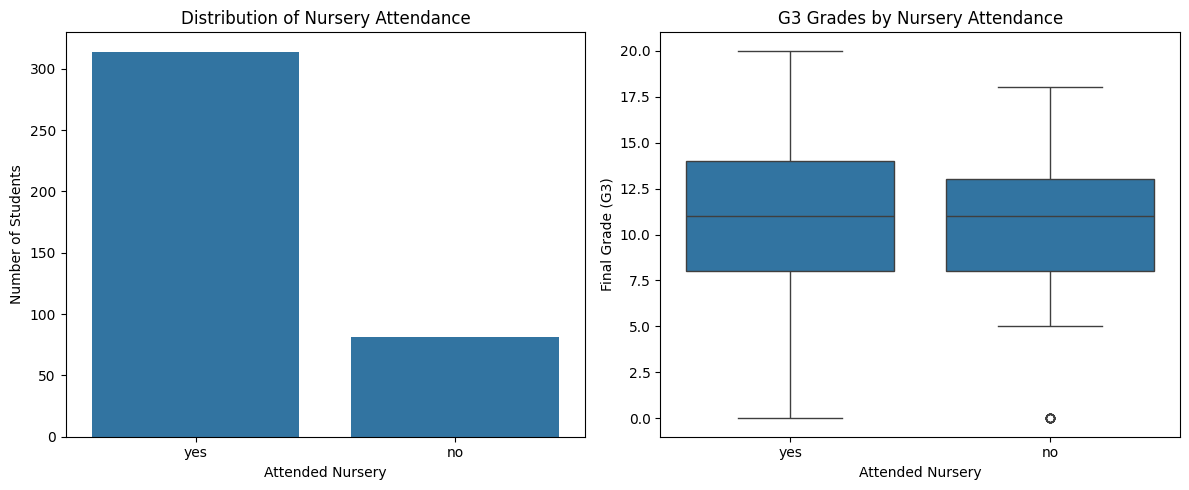

In [ ]:
plt.figure(figsize=(12, 5))

# Distribution of nursery
plt.subplot(1, 2, 1)
plt.title('Distribution of Nursery Attendance')
sns.countplot(x='nursery', data=df_mat)
plt.xlabel('Attended Nursery')
plt.ylabel('Number of Students')

# G3 Grades by nursery
plt.subplot(1, 2, 2)
plt.title('G3 Grades by Nursery Attendance')
sns.boxplot(x='nursery', y='G3', data=df_mat)
plt.xlabel('Attended Nursery')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

#### Observations on Nursery Attendance and G3 Grades

- **Distribution of Students by Nursery Attendance**:
    - significant majority of students (`yes`) attended nursery school, while a smaller portion (`no`) did not
    - this suggests that nursery attendance is a common educational background for students in this dataset

- **G3 Grades by Nursery Attendance (Box Plot)**:
    - the box plot shows that students who attended nursery school ('yes') tend to have a slightly higher G3 grade compared to those who did not ('no')
    
    - the IQR for students who attended nursery appears to be wider, encompassing a broader range of grades, including higher scores
    
    - Students who did not attend nursery ('no') seem to be more concentrated towards lower grades

While the difference in medians is not extremely large, it suggests a minor positive association between having attended nursery school and achieving better final grades.

This could imply that early childhood education might provide a foundational advantage that subtly contributes to academic performance later on.

### Study and Support: Intention for Higher Education

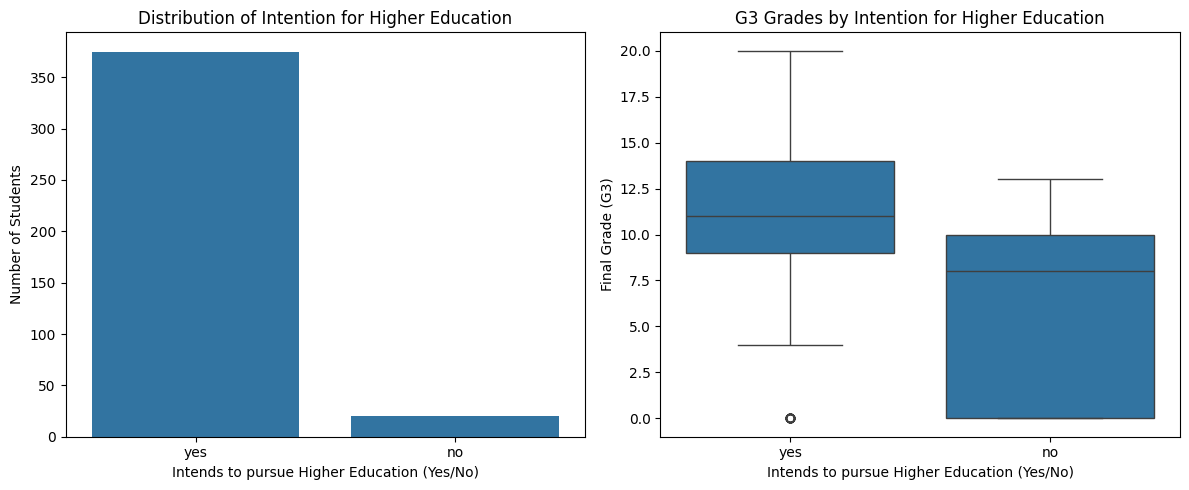

In [ ]:
plt.figure(figsize=(12, 5))

# Distribution of higher
plt.subplot(1, 2, 1)
plt.title('Distribution of Intention for Higher Education')
sns.countplot(x='higher', data=df_mat)
plt.xlabel('Intends to pursue Higher Education (Yes/No)')
plt.ylabel('Number of Students')

# G3 Grades by higher
plt.subplot(1, 2, 2)
plt.title('G3 Grades by Intention for Higher Education')
sns.boxplot(x='higher', y='G3', data=df_mat)
plt.xlabel('Intends to pursue Higher Education (Yes/No)')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

In [ ]:
df_mat['higher'].value_counts()

,count
higher,
yes,375
no,20


#### Observations on Intention for Higher Education and G3 Grades

- **Distribution of Students by Intention for Higher Education**:
    - vast majority of students ('yes') intend to pursue higher education, while only a small minority ('no') do not
    - this indicates a strong inclination towards higher education among the student population in this dataset

- **G3 Grades by Intention for Higher Education (Box Plot)**:
    - strong positive correlation:
        - students who intend to pursue higher education ('yes') have significantly higher median G3 grades
    
    - the IQR for students intending to pursue higher education is wider and extends to much higher grades, indicating a broad range of high-achieving students in this group
    
    - in contrast, students who do not intend to pursue higher education show a much lower median and a distribution heavily concentrated at the lower end

This factor appears to be one of the most influential determinants of G3 grades among the 'study and support' factors analyzed so far, suggesting that the ambition for higher education is strongly associated with better academic performance in the final grades.

This could be due to increased motivation, better study habits, or a self-selection bias where higher-performing students are more likely to aim for further studies.

### Study and Support: Internet Access

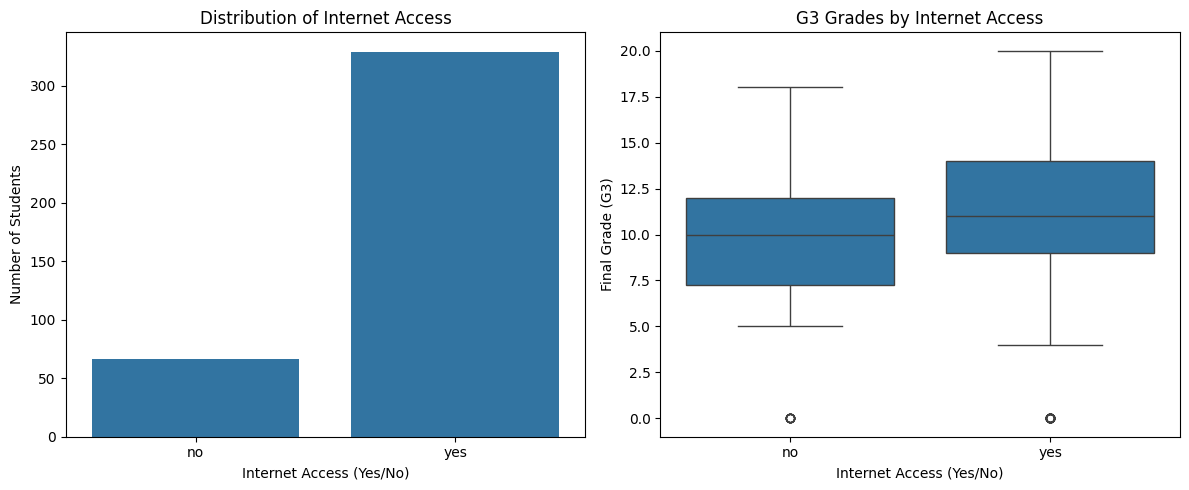

In [ ]:
plt.figure(figsize=(12, 5))

# Distribution of internet
plt.subplot(1, 2, 1)
plt.title('Distribution of Internet Access')
sns.countplot(x='internet', data=df_mat)
plt.xlabel('Internet Access (Yes/No)')
plt.ylabel('Number of Students')

# G3 Grades by internet
plt.subplot(1, 2, 2)
plt.title('G3 Grades by Internet Access')
sns.boxplot(x='internet', y='G3', data=df_mat)
plt.xlabel('Internet Access (Yes/No)')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

In [ ]:
df_mat['internet'].value_counts()

,count
internet,
yes,329
no,66


#### Observations on Internet Access and G3 Grades

- **Distribution of Students by Internet Access**:
    - large majority of students (`yes`) have internet access, while a smaller portion (`no`) do not
    - this indicates that internet access is widely available to students in this dataset

- **G3 Grades by Internet Access (Box Plot)**:
    - students who have internet access ('yes') tend to have a slightly higher median G3 grade compared to those who do not ('no')
    
    - the IQR for students with internet access appears to be wider, encompassing a broader range of grades, including higher scores
    
    - students without internet access ('no') have a slightly lower median and their distribution seems more concentrated towards lower grades
    
This observation suggests a positive association between having internet access and achieving better final grades.

This could be due to internet access providing resources for study, research, and communication, which can indirectly contribute to academic performance.

However, it's also possible that this correlation is influenced by other socioeconomic factors that often coincide with internet availability.

### School and Support: Romantic Relationships

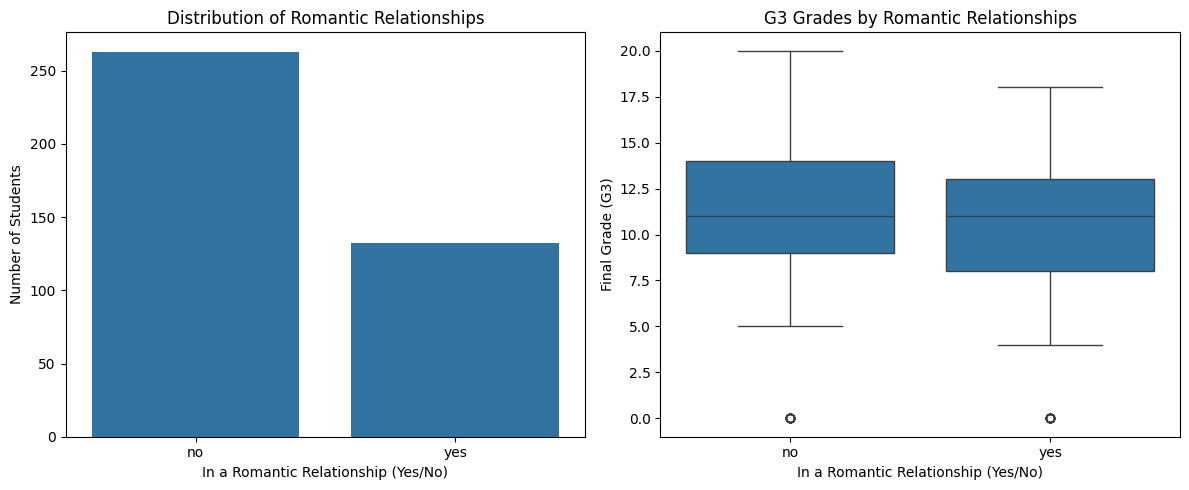

In [ ]:
plt.figure(figsize=(12, 5))

# Distribution of romantic
plt.subplot(1, 2, 1)
plt.title('Distribution of Romantic Relationships')
sns.countplot(x='romantic', data=df_mat)
plt.xlabel('In a Romantic Relationship (Yes/No)')
plt.ylabel('Number of Students')

# G3 Grades by romantic
plt.subplot(1, 2, 2)
plt.title('G3 Grades by Romantic Relationships')
sns.boxplot(x='romantic', y='G3', data=df_mat)
plt.xlabel('In a Romantic Relationship (Yes/No)')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

#### Observations on Romantic Relationships and G3 Grades

- **Distribution of Students by Romantic Relationships**:
    - larger proportion of students (`no`) are not in a romantic relationship compared to those who are (`yes`)
    - this suggests that romantic relationships are present but not universal among the student population in this dataset

- **G3 Grades by Romantic Relationships (Box Plot)**:
    - slight inverse relationship: students who are *not* in a romantic relationship ('no') tend to have a slightly higher median G3 grade compared to those who *are* ('yes')

    - the IQR for students not in romantic relationships appears similar, indicating a comparable spread of grades, but with a slight upward shift for the 'no' group
    
This observation might imply that involvement in romantic relationships could be associated with slightly lower academic performance, possibly due to time commitment or emotional distractions.

---

## **Analyze Social and Health Factors**

Explore social and health factors:
- `famrel`
- `freetime`
- `goout`
- `Dalc`
- `Walc`
- `health`
- `absences`

### Social and Health: Family Relationships

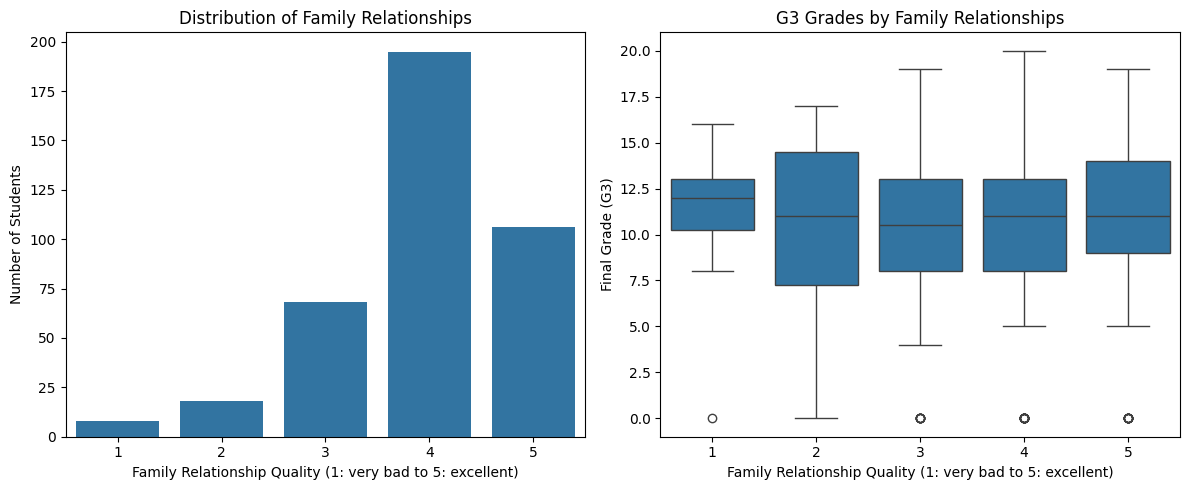

In [ ]:
plt.figure(figsize=(12, 5))

# Distribution of famrel
plt.subplot(1, 2, 1)
plt.title('Distribution of Family Relationships')
sns.countplot(x='famrel', data=df_mat)
plt.xlabel('Family Relationship Quality (1: very bad to 5: excellent)')
plt.ylabel('Number of Students')

# G3 Grades by famrel
plt.subplot(1, 2, 2)
plt.title('G3 Grades by Family Relationships')
sns.boxplot(x='famrel', y='G3', data=df_mat)
plt.xlabel('Family Relationship Quality (1: very bad to 5: excellent)')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

In [ ]:
df_mat['famrel'].value_counts()
df_mat.loc[df_mat['famrel'] == 1]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
25,GP,F,16,U,GT3,T,2,2,services,services,home,mother,1,1,2,no,yes,yes,no,no,yes,yes,no,1,2,2,1,3,5,14,6,9,8
66,GP,M,15,U,GT3,A,4,4,other,services,reputation,mother,1,4,0,no,yes,no,yes,no,yes,yes,yes,1,3,3,5,5,3,4,13,13,12
108,GP,M,15,R,GT3,T,4,4,other,other,home,father,4,4,0,no,yes,yes,yes,yes,yes,yes,yes,1,3,5,3,5,1,6,10,13,13
184,GP,F,16,U,GT3,T,3,2,other,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,1,2,2,1,2,1,14,12,13,12
207,GP,F,16,U,GT3,T,4,3,teacher,other,other,mother,1,2,0,no,no,yes,yes,yes,yes,yes,yes,1,3,2,1,1,1,10,11,12,13
299,GP,M,18,U,LE3,T,4,4,teacher,teacher,home,mother,1,1,0,no,yes,yes,no,yes,yes,yes,yes,1,4,2,2,2,1,5,16,15,16
357,MS,F,17,U,LE3,A,3,2,services,other,reputation,mother,2,2,0,no,no,no,no,yes,yes,no,yes,1,2,3,1,2,5,2,12,12,11
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0


#### Observations on Family Relationships (famrel) and G3 Grades

- **Distribution of Students by Family Relationships**:
    - large majority of students report having good to excellent family relationships (levels 4 and 5), with level 4 being the most frequent
    - smaller number of students report average (level 3) or very bad to bad (levels 1 and 2) family relationships
    - this indicates that most students generally perceive their family relationships positively

- **G3 Grades by Family Relationships (Box Plot)**:
    - subtle positive correlation:
        - students with better family relationships (higher `famrel` values, especially 4 and 5) tend to have slightly higher median G3 grades compared to those with poorer family relationships

This observation suggests that positive family relationships are generally associated with better academic outcomes, while very poor family relationships can be a significant detrimental factor.

### Social and Health: Free Time

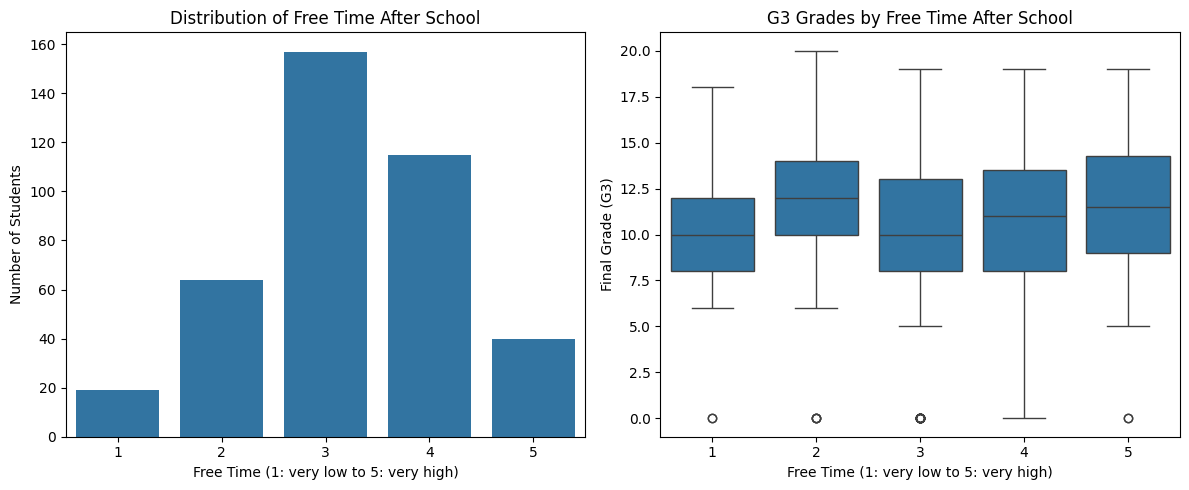

In [ ]:
plt.figure(figsize=(12, 5))

# Distribution of freetime
plt.subplot(1, 2, 1)
plt.title('Distribution of Free Time After School')
sns.countplot(x='freetime', data=df_mat)
plt.xlabel('Free Time (1: very low to 5: very high)')
plt.ylabel('Number of Students')

# G3 Grades by freetime
plt.subplot(1, 2, 2)
plt.title('G3 Grades by Free Time After School')
sns.boxplot(x='freetime', y='G3', data=df_mat)
plt.xlabel('Free Time (1: very low to 5: very high)')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

### Social and Health: Time Spent Going Out

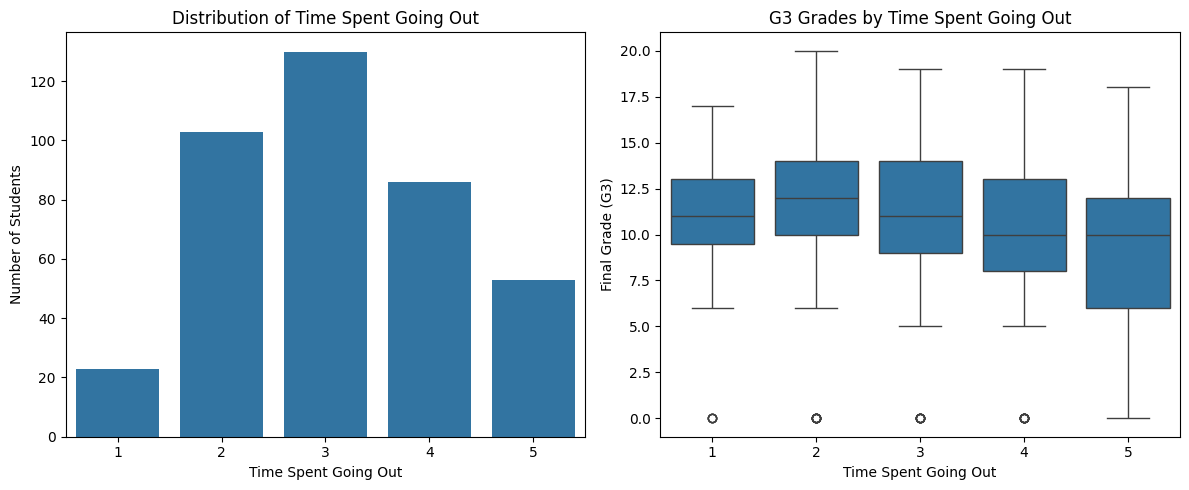

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Distribution of Time Spent Going Out')
sns.countplot(x='goout', data=df_mat)
plt.xlabel('Time Spent Going Out')
plt.ylabel('Number of Students')

plt.subplot(1, 2, 2)
plt.title('G3 Grades by Time Spent Going Out')
sns.boxplot(x='goout', y='G3', data=df_mat)
plt.xlabel('Time Spent Going Out')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

### Social and Health: Alcohol Consumption???

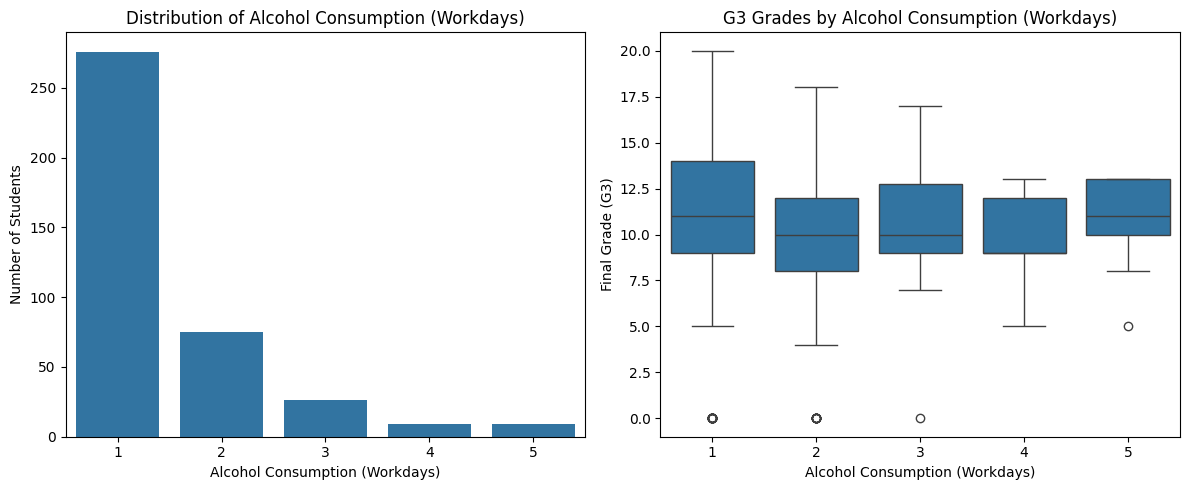

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Distribution of Alcohol Consumption (Workdays)')
sns.countplot(x='Dalc', data=df_mat)
plt.xlabel('Alcohol Consumption (Workdays)')
plt.ylabel('Number of Students')

plt.subplot(1, 2, 2)
plt.title('G3 Grades by Alcohol Consumption (Workdays)')
sns.boxplot(x='Dalc', y='G3', data=df_mat)
plt.xlabel('Alcohol Consumption (Workdays)')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

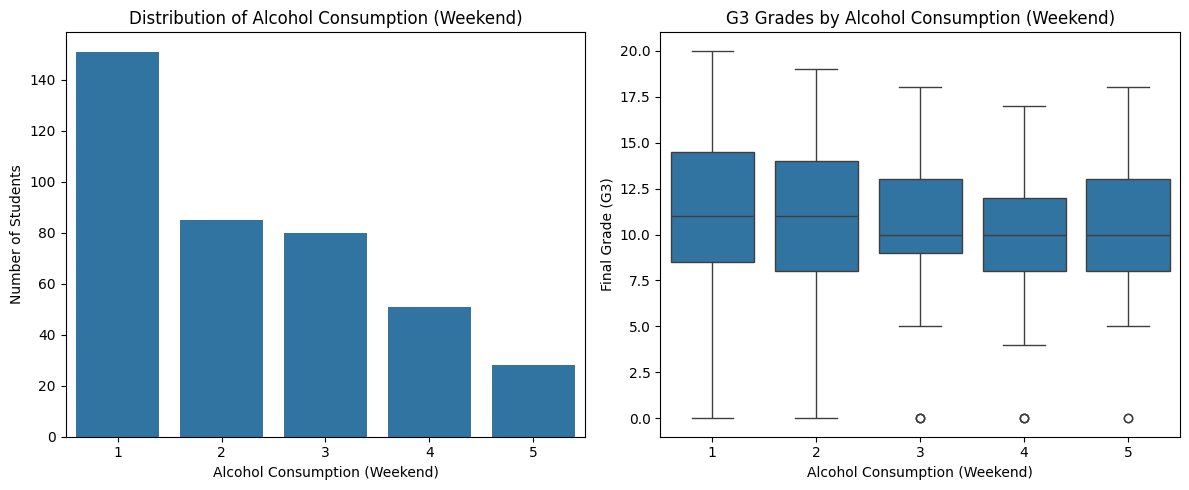

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Distribution of Alcohol Consumption (Weekend)')
sns.countplot(x='Walc', data=df_mat)
plt.xlabel('Alcohol Consumption (Weekend)')
plt.ylabel('Number of Students')

plt.subplot(1, 2, 2)
plt.title('G3 Grades by Alcohol Consumption (Weekend)')
sns.boxplot(x='Walc', y='G3', data=df_mat)
plt.xlabel('Alcohol Consumption (Weekend)')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

### Social and Health: Health

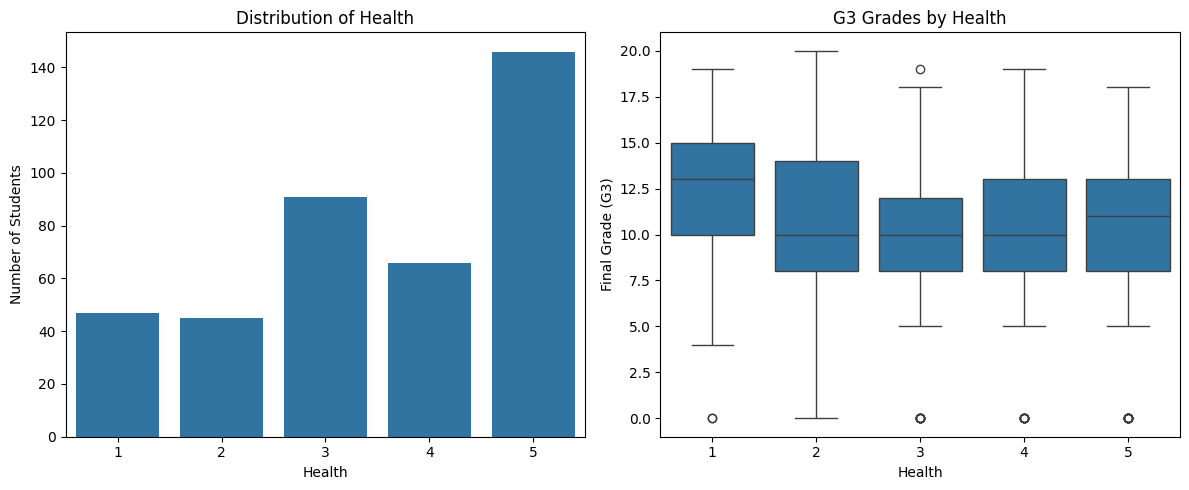

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Distribution of Health')
sns.countplot(x='health', data=df_mat)
plt.xlabel('Health')
plt.ylabel('Number of Students')

plt.subplot(1, 2, 2)
plt.title('G3 Grades by Health')
sns.boxplot(x='health', y='G3', data=df_mat)
plt.xlabel('Health')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

### Social and Health: Absences

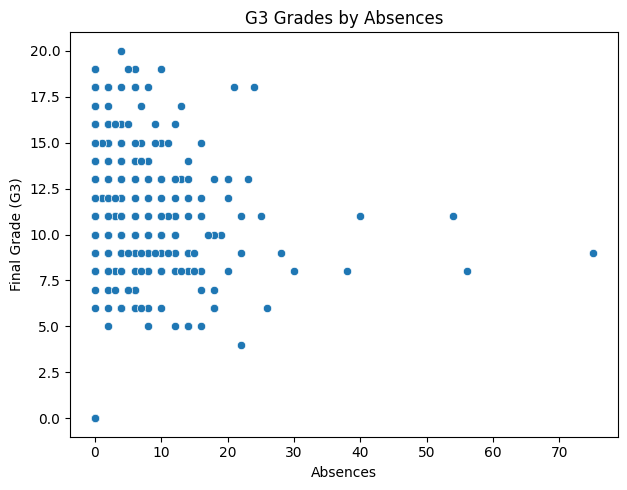

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.title('G3 Grades by Absences')
sns.scatterplot(x='absences', y='G3', data=df_mat)
plt.xlabel('Absences')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

# **Preprocessing**

## **Dropping Features**

In [ ]:
df_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df_mat_preprocessing = df_mat.copy()
df_mat_preprocessing = df_mat_preprocessing.drop(columns=['G1', 'G2'])

In [ ]:
categorical_features = df_mat_preprocessing.describe(exclude=np.number).columns
display(df_mat_preprocessing.shape)
display(df_mat_preprocessing[categorical_features].head())

(395, 31)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


## **Encoding**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder().fit(df_mat_preprocessing[categorical_features])
encoded = encoder.fit_transform(df_mat_preprocessing[categorical_features])
df_mat_preprocessing[categorical_features] = pd.DataFrame(encoded)
df_mat_preprocessing.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0.0,0.0,18,1.0,0.0,0.0,4,4,0.0,4.0,0.0,1.0,2,2,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4,3,4,1,1,3,6,6
1,0.0,0.0,17,1.0,0.0,1.0,1,1,0.0,2.0,0.0,0.0,1,2,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5,3,3,1,1,3,4,6
2,0.0,0.0,15,1.0,1.0,1.0,1,1,0.0,2.0,2.0,1.0,1,2,3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,4,3,2,2,3,3,10,10
3,0.0,0.0,15,1.0,0.0,1.0,4,2,1.0,3.0,1.0,1.0,1,3,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,2,2,1,1,5,2,15
4,0.0,0.0,16,1.0,0.0,1.0,3,3,2.0,2.0,1.0,0.0,1,2,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4,3,2,1,2,5,4,10


## **Correlation Heatmap**

<Axes: >

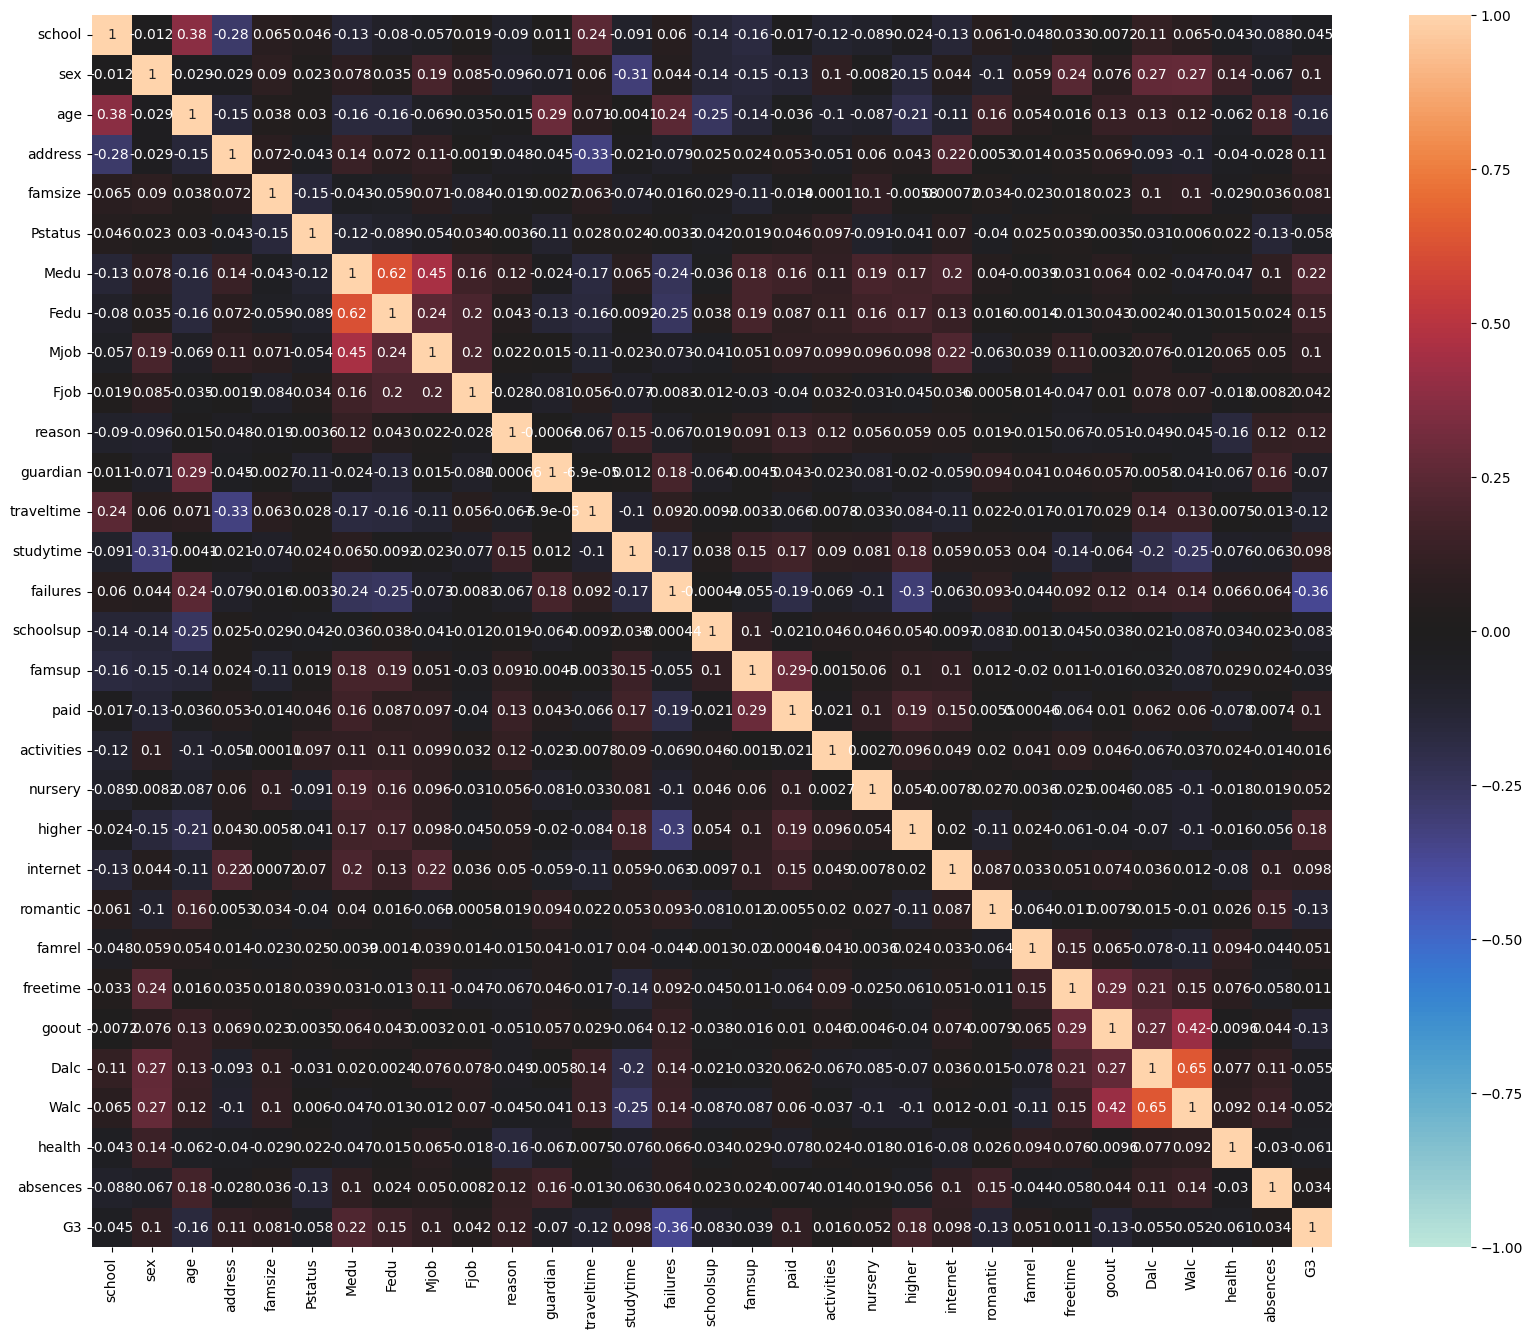

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_mat_preprocessing.corr(), annot=True, vmin=-1.0, vmax=1.0, center=0.0)

In [ ]:
correlation_pairs = df_mat_preprocessing.corr().unstack()

sorted_pairs = correlation_pairs.abs().sort_values(ascending=False)

unique_pairs = sorted_pairs[sorted_pairs.index.map(lambda x: x[0] != x[1])]
unique_pairs = unique_pairs.loc[~unique_pairs.index.map(lambda x: (x[1], x[0]) in unique_pairs.index and x[0] > x[1])]

df_unique_pairs = pd.DataFrame(unique_pairs)
df_unique_pairs.rename(columns={0: 'Correlation'}, inplace=True)

df_unique_pairs.head(20)

,,Correlation
Dalc,Walc,0.647544
Fedu,Medu,0.623455
Medu,Mjob,0.454805
Walc,goout,0.420386
age,school,0.377610
G3,failures,0.360415
address,traveltime,0.328096
sex,studytime,0.306268
failures,higher,0.300316
famsup,paid,0.293184


## **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

df_mat_preprocessing[df_mat_preprocessing.columns] = pd.DataFrame(StandardScaler().fit_transform(df_mat_preprocessing))
df_mat_preprocessing.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,-0.36305,-0.948176,1.023046,0.535392,-0.636941,-2.938392,1.143856,1.360371,-1.769793,1.993149,-1.040599,0.273945,0.792251,-0.042286,-0.449944,2.597133,-1.257656,-0.919671,-1.017881,0.507899,0.23094,-2.232677,-0.708450,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-0.964934
1,-0.36305,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,-1.040599,-1.591714,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,-0.919671,-1.017881,-1.968894,0.23094,0.447893,-0.708450,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-0.964934
2,-0.36305,-0.948176,-1.330954,0.535392,1.570004,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,0.616806,0.273945,-0.643249,-0.042286,3.589323,2.597133,-1.257656,1.087346,-1.017881,0.507899,0.23094,0.447893,-0.708450,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-0.090739
3,-0.36305,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.954077,0.833659,-0.211896,0.273945,-0.643249,1.150779,-0.449944,-0.385040,0.795130,1.087346,0.982433,0.507899,0.23094,0.447893,1.411533,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.002004
4,-0.36305,-0.948176,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.138362,-0.325831,-0.211896,-1.591714,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,1.087346,-1.017881,0.507899,0.23094,-2.232677,-0.708450,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-0.090739


## **Princial Component Analysis (PCA)**

- PCA is a method used in unsupervised machine learning (such as clustering) that reduces high-dimension data to smaller dimensions while preserving as much information as possible.

- By using PCA before applying clustering algorithms, we:
    - reduce dimensions and data noise
    - decrease computation cost
    
- The number of features will be reduced to **2 dimensions** so that the clustering results can be visualized.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [ ]:
X = df_mat_preprocessing.copy()
X = np.asarray(X)
X

array([[-0.3630498 , -0.94817639,  1.02304645, ..., -0.39928949,
         0.03642446, -0.96493392],
       [-0.3630498 , -0.94817639,  0.23837976, ..., -0.39928949,
        -0.21379577, -0.96493392],
       [-0.3630498 , -0.94817639, -1.33095364, ..., -0.39928949,
         0.53686493, -0.0907392 ],
       ...,
       [ 2.75444305,  1.05465609,  3.37704655, ..., -0.39928949,
        -0.33890588, -0.74638524],
       [ 2.75444305,  1.05465609,  1.02304645, ...,  1.04106985,
        -0.71423623, -0.0907392 ],
       [ 2.75444305,  1.05465609,  1.80771315, ...,  1.04106985,
        -0.08868565, -0.30928788]])

In [ ]:
X = PCA(n_components=2, random_state=24).fit_transform(X)
X.shape, X[:10]

((395, 2),
 array([[ 0.07838224, -0.95134013],
        [-0.85141961, -2.52981036],
        [-1.43367536, -1.61332777],
        [ 2.4821898 , -1.39035209],
        [ 1.26697218, -1.09708706],
        [ 2.25793789,  1.22966151],
        [-0.10051932, -0.08295089],
        [ 1.36187206, -1.14411335],
        [ 2.3356649 , -0.34207265],
        [ 2.40434443,  0.3975179 ]]))

## **KMeans Clustering**

Finding the ideal number of cluster:
- **Silhouette** - measures how similar a data point is to its own cluster compared to other clusters, with a score ranging from -1 to +1. A high score indicates that the clusters are well-separated, while a low score suggests overlapping or incorrectly clustered data
- **Davies-Bouldin** index is based on the principle that good clustering should minimize within-cluster scatter while maximizing between-cluster separation. Lower DB values indicate better clustering, as they represent clusters that are more compact and better separated from each other.
- **Calinski-Harabasz** - A higher value of CH indicates a better clustering, because it means that the data points are more spread out between clusters than they are within clusters.

In [ ]:
clustering_scores = []

cluster_search_range = range(2,10)

for k in cluster_search_range:
    kmeans = KMeans(n_clusters=k, random_state=4)
    clustering = kmeans.fit(X)

    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': silhouette_score(X, clustering.labels_),
        'davies_bouldin': davies_bouldin_score(X, clustering.labels_),
        'calinski_harabasz': calinski_harabasz_score(X, clustering.labels_),
    })

df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')
df_clustering_scores

,sse,silhouette,davies_bouldin,calinski_harabasz
k,,,,
2,1418.295702,0.376806,1.119729,231.685651
3,967.748775,0.360005,0.930635,260.592957
4,701.501461,0.356886,0.861897,288.693584
5,596.457046,0.325296,0.927942,271.020124
6,517.264542,0.328401,0.864086,261.280375
7,429.941413,0.341597,0.887722,274.417072
8,380.232001,0.346100,0.886257,272.507551
9,352.715947,0.341263,0.908347,260.145470


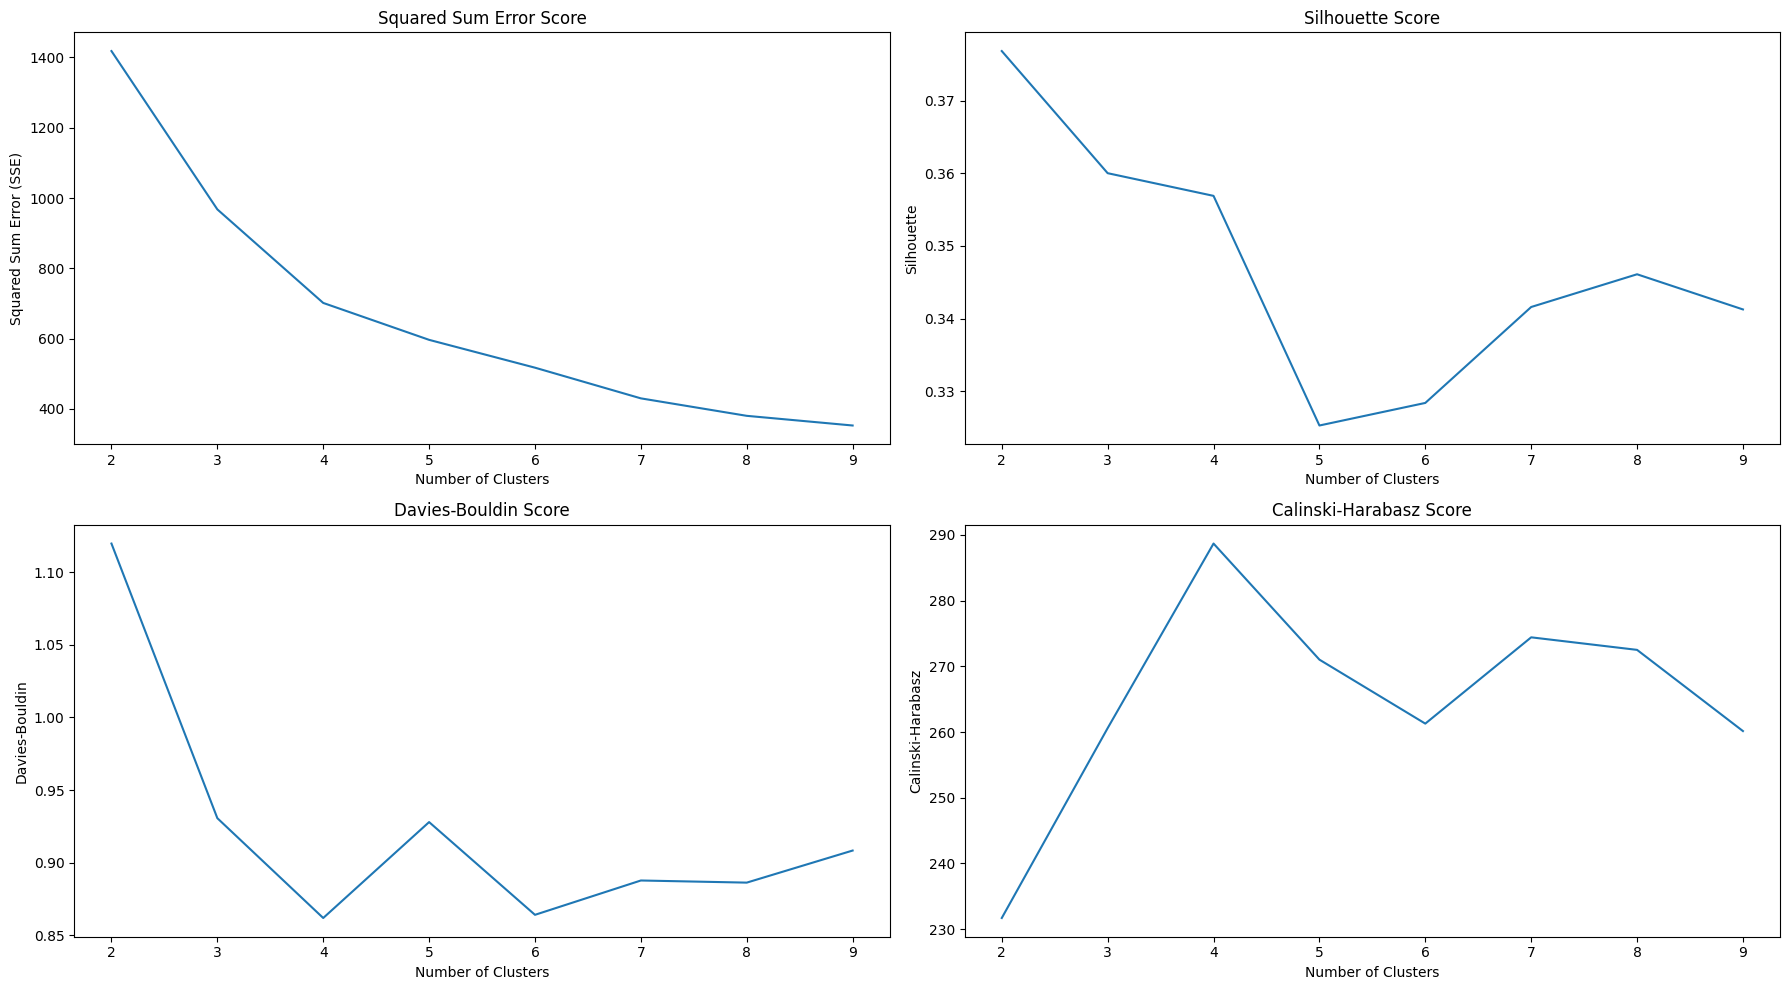

In [ ]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
plt.title('Squared Sum Error Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Squared Sum Error (SSE)')
plt.xticks(cluster_search_range)
sns.lineplot(df_clustering_scores['sse'])

plt.subplot(2, 2, 2)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette')
plt.xticks(cluster_search_range)
sns.lineplot(df_clustering_scores['silhouette'])

plt.subplot(2, 2, 3)
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin')
plt.xticks(cluster_search_range)
sns.lineplot(df_clustering_scores['davies_bouldin'])

plt.subplot(2, 2, 4)
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz')
plt.xticks(cluster_search_range)
sns.lineplot(df_clustering_scores['calinski_harabasz'])

plt.tight_layout()
plt.show()

In [ ]:
selected_cluster_count = 4

score_columns = [
    'sse',
    'silhouette',
    'davies_bouldin',
    'calinski_harabasz',
]

{ col: df_clustering_scores[col].iloc[selected_cluster_count] for col in score_columns }

{'sse': np.float64(517.2645417022876),
 'silhouette': np.float64(0.3284005402588937),
 'davies_bouldin': np.float64(0.8640859641280757),
 'calinski_harabasz': np.float64(261.28037534865905)}

The ideal number of clusters seem to be **4** as we want to minimize SSE and Davies-Bouldin and maximize silhouette and Calinski-Harabasz.

In [ ]:
from sklearn.cluster import KMeans

df_mat_clustering = df_mat_preprocessing.copy()

y_kmeans = KMeans(n_clusters=4).fit_predict(X)
df_mat_clustering['CLUSTER'] = y_kmeans

display(df_mat_clustering.head())
display(df_mat_clustering['CLUSTER'].value_counts())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,CLUSTER
0,-0.36305,-0.948176,1.023046,0.535392,-0.636941,-2.938392,1.143856,1.360371,-1.769793,1.993149,-1.040599,0.273945,0.792251,-0.042286,-0.449944,2.597133,-1.257656,-0.919671,-1.017881,0.507899,0.23094,-2.232677,-0.708450,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-0.964934,0
1,-0.36305,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,-1.040599,-1.591714,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,-0.919671,-1.017881,-1.968894,0.23094,0.447893,-0.708450,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-0.964934,0
2,-0.36305,-0.948176,-1.330954,0.535392,1.570004,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,0.616806,0.273945,-0.643249,-0.042286,3.589323,2.597133,-1.257656,1.087346,-1.017881,0.507899,0.23094,0.447893,-0.708450,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-0.090739,0
3,-0.36305,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.954077,0.833659,-0.211896,0.273945,-0.643249,1.150779,-0.449944,-0.385040,0.795130,1.087346,0.982433,0.507899,0.23094,0.447893,1.411533,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.002004,3
4,-0.36305,-0.948176,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.138362,-0.325831,-0.211896,-1.591714,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,1.087346,-1.017881,0.507899,0.23094,-2.232677,-0.708450,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-0.090739,3


,count
CLUSTER,
3,139
1,113
0,95
2,48


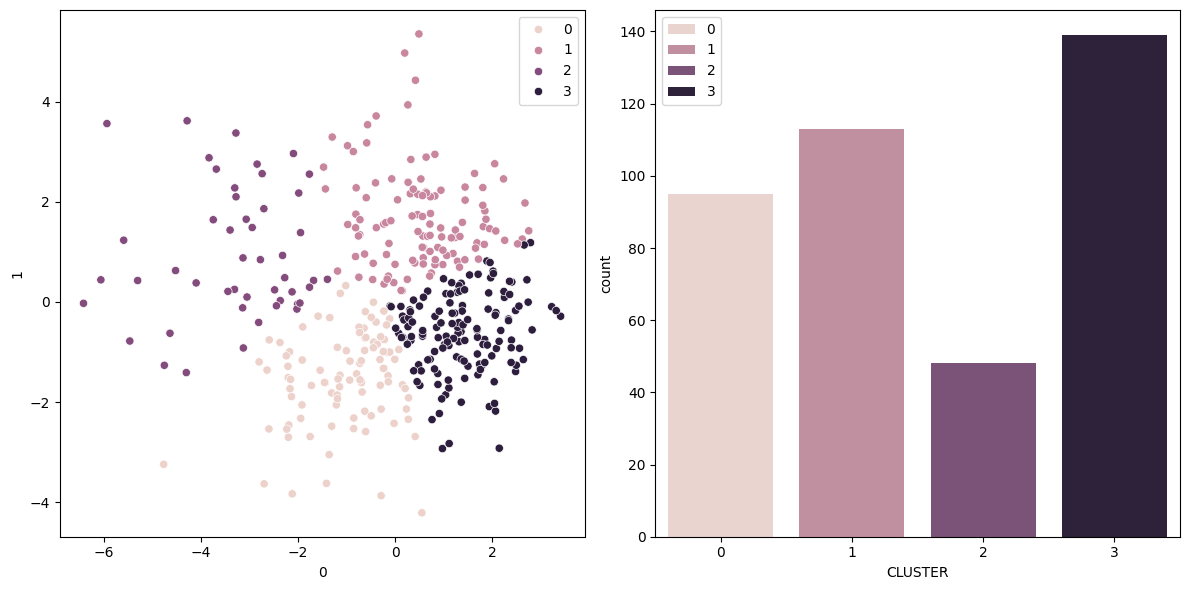

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=pd.DataFrame(X), x=0, y=1, hue=y_kmeans)

plt.subplot(1, 2, 2)
sns.countplot(df_mat_clustering, x='CLUSTER', hue=y_kmeans)

plt.tight_layout()
plt.show()

#### Observations on KMeans Clustering

From the 4 clusters, there are 3 somewhat consistent clusters.
The cluster 1 seems to be containing anomalies, while clusters 2 and 3 are far more consistent.
The most consistent of them is cluster 0.

## **Agglomerative Clustering**

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    """
    Create linkage matrix and then plot the dendrogram
    """

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    plt.title('Hierarchical Clustering Dendrogram')
    dendrogram(linkage_matrix, **kwargs)
    plt.ylabel('distance')

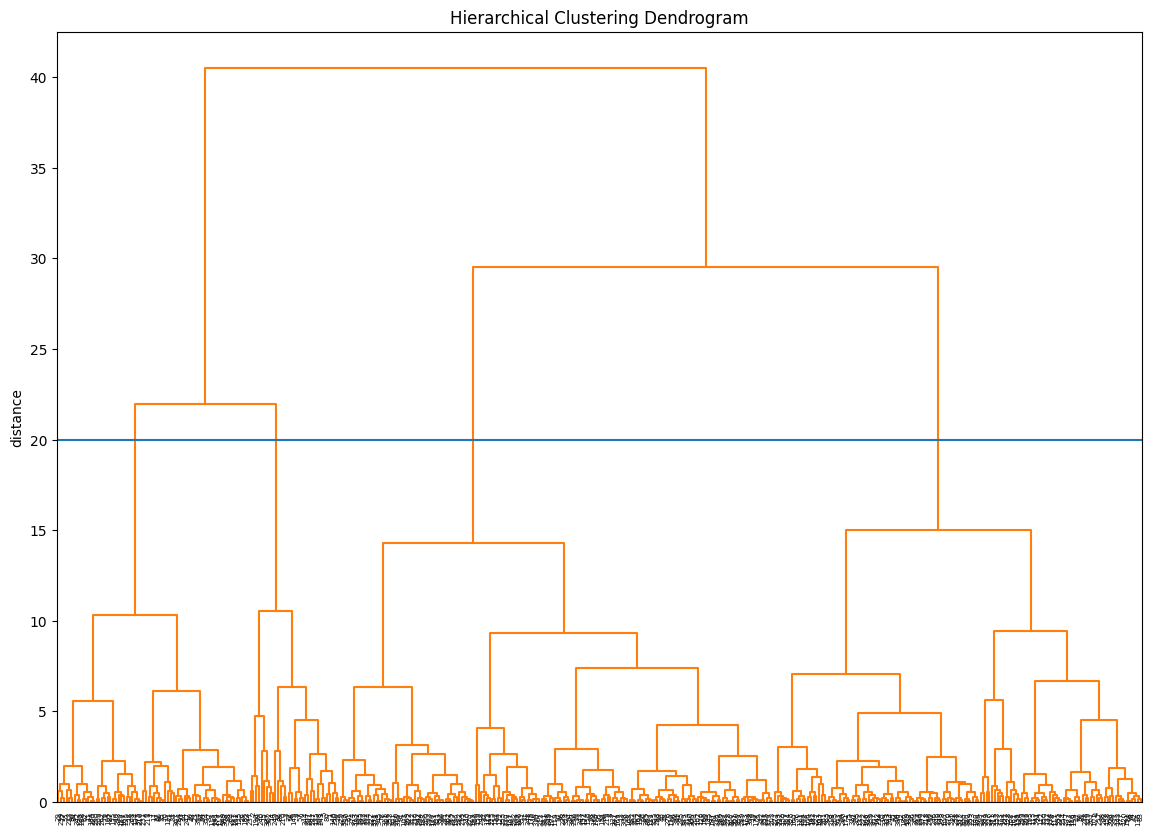

In [ ]:
clustering = AgglomerativeClustering(
    linkage='ward',
    distance_threshold=0,
    n_clusters=None
).fit(X)

agglo_threshold = 20

plt.figure(figsize=(14, 10))
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)
plt.axhline(y=agglo_threshold)

I choose **4** clusters.

In [ ]:
clustering = AgglomerativeClustering(
    linkage='ward',
    distance_threshold=agglo_threshold,
    n_clusters=None
)
clustering.fit(X)
pd.Series(clustering.labels_).value_counts()

,count
2,158
0,134
3,70
1,33


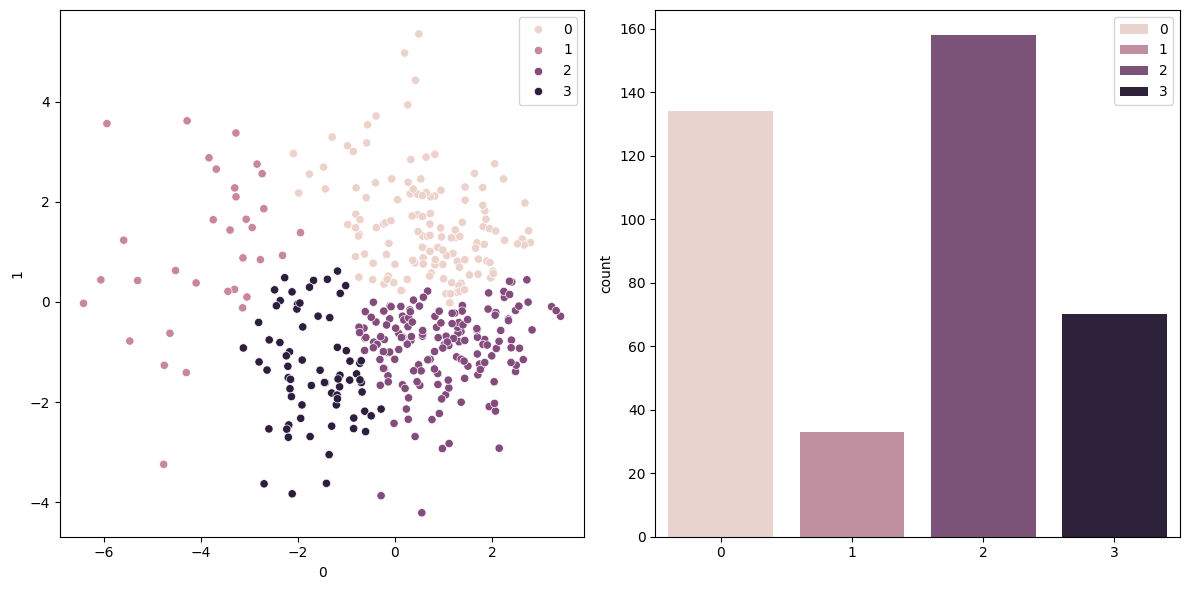

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=pd.DataFrame(X), x=0, y=1, hue=clustering.labels_)

plt.subplot(1, 2, 2)
sns.countplot(x=clustering.labels_, hue=clustering.labels_)

plt.tight_layout()
plt.show()

## **Cluster Profiling**

Clusters obtained from agglomerative clustering seem more consistent.

In [ ]:
# df.drop(columns=['cluster_id'], inplace=True)
df_profile = df_mat.copy()
df_profile['CLUSTER_ID'] = clustering.labels_
display(df_profile.shape)
df_profile.head(5)

(395, 34)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,CLUSTER_ID
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,3
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,3
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,2
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,2


### **Numerical Analysis**

In [ ]:
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = df_mat.describe().loc[['mean']].T

df_summary = df_profile.groupby('CLUSTER_ID') \
                .describe().T \
                .reset_index() \
                .rename(columns={
                    'level_0': 'COLUMN_NAME',
                    'level_1': 'METRICS'
                })

df_summary = df_summary[df_summary.METRICS == 'mean'].set_index('COLUMN_NAME')
df_summary = df_summary.join(df_profile_overall).reset_index()
df_summary

,COLUMN_NAME,METRICS,0,1,2,3,Overall
0,age,mean,16.529851,17.939394,16.310127,17.300000,16.696203
1,Medu,mean,3.507463,1.787879,2.778481,1.685714,2.749367
2,Fedu,mean,3.261194,1.515152,2.455696,1.728571,2.521519
3,traveltime,mean,1.358209,2.121212,1.297468,1.642857,1.448101
4,studytime,mean,1.835821,1.303030,2.398734,1.942857,2.035443
5,failures,mean,0.179104,1.272727,0.139241,0.628571,0.334177
6,famrel,mean,3.910448,4.000000,3.993671,3.871429,3.944304
7,freetime,mean,3.544776,3.787879,2.905063,3.128571,3.235443
8,goout,mean,3.529851,3.848485,2.696203,2.885714,3.108861
9,Dalc,mean,1.813433,2.666667,1.075949,1.200000,1.481013


In [ ]:
categorical_features, len(categorical_features)

(Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
        'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
        'nursery', 'higher', 'internet', 'romantic'],
       dtype='object'),
 17)

### **Categorical Analysis**

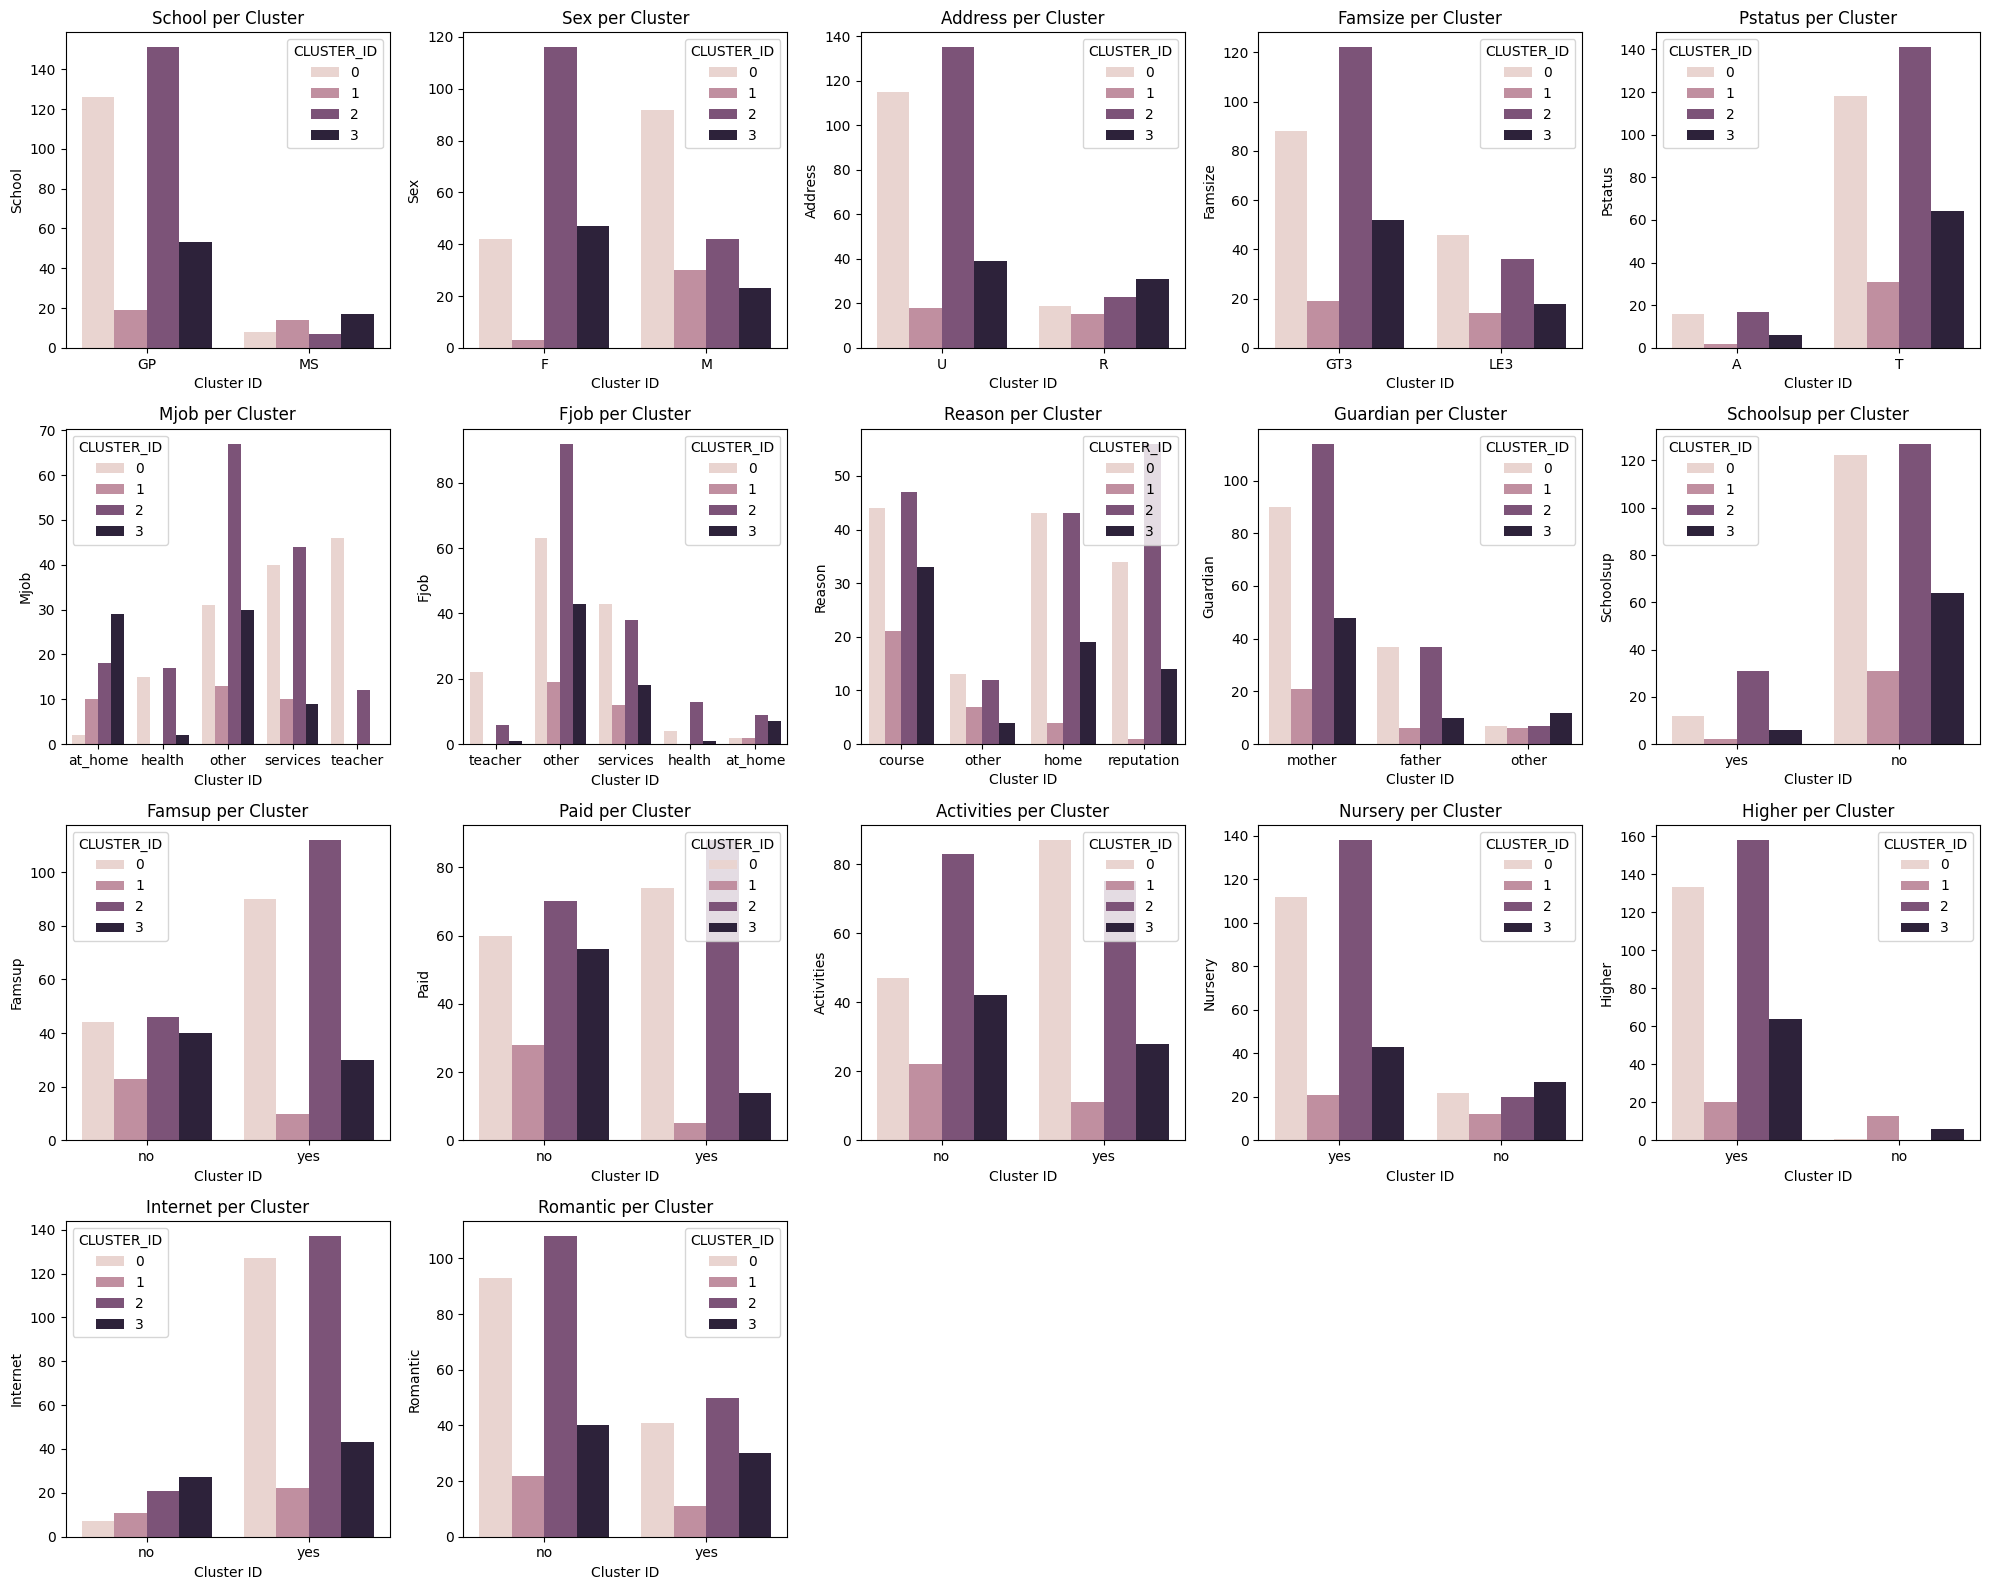

In [ ]:
plt.figure(figsize=(20,16))

for index, column in enumerate(categorical_features):
    plt.subplot(4, 5, index + 1)
    plt.title(column.capitalize() + ' per Cluster')
    plt.xlabel('Cluster ID')
    plt.ylabel(column.capitalize())
    sns.countplot(df_profile, x=df_profile[column], hue=df_profile.CLUSTER_ID)

plt.tight_layout()
plt.show()

### **Cluster 0 – Smart Kids**

- Come from the most educated and socio-economically stable families; many of their parents work in education, frequently as teachers.
- Their strong academic performance likely stems from both inherited cognitive aptitude and a supportive environment that enables achievement without the need for excessive effort.
- Maintain high levels of social activity—go out and drink significantly more than other clusters, despite traveling the least.
- Achieve the best grades overall, even though they do not study the hardest.
- Notably, they also record the highest number of school absences, which contrasts with their academic success.
- A lot of them are male sex.
- In general, they are high-performing, physically healthy, socially active students with strong foundational advantages.

---

### **Cluster 1 – Seniors**

- Consist of the oldest students in the dataset.
- Their parents have the lowest level of formal education among all clusters.
- Have the most free time, which they predominantly spend on traveling, socializing, and drinking alcohol, while dedicating minimal effort to studying.
- Perform the worst academically, with the lowest grades and highest failure rates.
- Characterized by a carefree attitude toward school, prioritizing experiences and social life over academic performance.

---

### **Cluster 2 – Try-Hard Nerds**

- Have educated parents, which may contribute to strong academic motivation and pressure to perform.
- Spend the majority of their limited free time studying, resulting in the least time for social activities.
- Go out, travel, and drink the least of all clusters.
- Report the poorest overall health, likely due to high stress, low physical activity, and social isolation.
- Achieve the second-best grades but trail behind Cluster 0 despite studying considerably harder.
- A lot of them are female sex (pretty much inverse to cluster 0).
- Represent high-effort, high-achievement students who compensate for lower innate privilege or talent with discipline and hard work.

---

### **Cluster 3 – Stubborn Learners**

- Composed of relatively older students.
- Their parents have low levels of formal education, similar to Cluster 1.
- Many students live in rural areas, often far from academic resources and peer competition.
A significant number lack reliable internet access, reducing their ability to study effectively, complete assignments, or leverage online tools.
- Study the second-most after Cluster 2, though this effort does not translate proportionally into strong academic results.
- Engage in weekend social activities and alcohol consumption more than Cluster 2 but less than Cluster 0.
- Have the second-least free time, limiting their ability to travel or socialize regularly.
- Experience more academic failures, underwhelming grades, and high effort-to-reward imbalance.
- These students face the steepest challenges—persistent and hardworking, but constrained by weaker academic foundations and fewer opportunities to convert effort into correlated outcomes. Persistent, hardworking students who genuinely try despite structural barriers—fewer opportunities, limited digital access, and weaker support systems—making academic success significantly harder to attain.